# 🧠 Beyond the Black Box: Making AI Transparent in Alzheimer’s Detection

## 📌 Introduction

Artificial Intelligence has demonstrated remarkable potential in medical imaging tasks, especially in diagnosing neurodegenerative conditions like Alzheimer’s disease (AD) using MRI scans. Deep learning models, particularly convolutional neural networks (CNNs), have shown high classification accuracy in identifying AD and its early stages such as Mild Cognitive Impairment (MCI). However, despite these promising results, one critical issue remains unsolved — these models are often **black boxes**, providing predictions without offering insight into *how* or *why* a decision was made.

This lack of transparency presents a major barrier to clinical adoption. In real-world medical settings, trust is paramount — doctors and radiologists cannot rely on opaque predictions without understanding the underlying reasoning. In fact, surveys like those by the American Medical Association report that over 78% of physicians are reluctant to adopt AI tools that cannot explain their decisions. History has shown this time and again: promising healthcare AI systems such as IBM Watson for Oncology and DeepMind’s Streams App faced real-world rejection not because of accuracy, but due to **a lack of explainability**.

In high-stakes fields like Alzheimer's detection, **false negatives** (missing actual cases) and **false positives** (flagging healthy patients) can lead to serious consequences. Therefore, accuracy alone is not enough — models must be **interpretable**, **transparent**, and **clinically trustworthy**.

## 🎯 Project Objective

This project aims to build a 3D Convolutional Neural Network (3D-CNN) for classifying brain MRI scans from the **OASIS-3 dataset** into three diagnostic categories:

- **Healthy**
- **Mild Cognitive Impairment (MCI)**
- **Alzheimer’s Disease (AD)**

But we won’t stop at just classification. Our goal is to go **beyond the black box** by integrating **Explainable AI (XAI)** techniques to highlight *which brain regions* influence model predictions, and *how* different features contribute to the diagnosis.

This notebook walks through the entire workflow:
- Preparing and structuring the OASIS-3 dataset
- Preprocessing 3D MRI volumes
- Designing and training a 3D-CNN model
- Evaluating performance using clinically-relevant metrics
- Applying explainability tool **3D Grad-CAM** to interpret model decisions

> 🧩 While we do not believe that Explainable AI (XAI) will *magically* build doctors’ trust in AI overnight, we see this as a **first step toward establishing trust** — a necessary foundation on which future clinical collaboration and adoption can be built.

## 💡 Why This Matters

Alzheimer’s currently affects over 55 million people globally, with this number expected to nearly double every 20 years. Early detection and monitoring are essential to improving patient outcomes, and deep learning can be a powerful ally in that process — but only if it is **trusted**.

By integrating explainability directly into our pipeline, we aim to:
- Reduce clinician skepticism toward AI models
- Build transparency around how model decisions are made
- Support future clinical use where **interpretability is as important as accuracy**

Ultimately, this project lays the foundation for building **trustworthy, interpretable, and impactful AI tools** for Alzheimer’s care.


---------------------------------------

## 💼 Business Context: Why Explainability and Accuracy Both Matter

In a healthcare setting, particularly for a condition as serious as Alzheimer’s disease, the implications of AI model errors go far beyond accuracy percentages — they directly impact people’s lives, clinical workflows, and healthcare costs.

Our AI model is designed to assist clinicians by classifying patients into one of three stages: **Healthy**, **Mild Cognitive Impairment (MCI)**, or **Alzheimer’s Disease (AD)** using structural MRI scans. A reliable and explainable model can reduce diagnostic delay, improve treatment planning, and support earlier intervention — but an untrustworthy model can do more harm than good.

### ⚠️ Understanding Model Errors in This Context

- **False Positives (FP):**  
  The model incorrectly classifies a healthy patient as having MCI or AD.  
  ➤ **Real-world impact:** Unnecessary stress for the patient and family, expensive follow-up tests, potential overtreatment, and resource misallocation.

- **False Negatives (FN):**  
  The model incorrectly classifies a patient with MCI or AD as healthy.  
  ➤ **Real-world impact:** Far more dangerous. This can lead to missed early interventions, faster cognitive decline, and worsening patient outcomes.

### 🎯 Metric Focus: What Matters Most?

While we will track multiple performance metrics, **Recall (Sensitivity)** will be our primary focus. Here's why:

- **Recall** measures the proportion of *actual patients with MCI or AD* that the model correctly identifies.
- In this medical context, **missing true cases (false negatives)** is **riskier** than over-flagging healthy patients.
- However, we also need to **avoid overwhelming clinicians** with too many false alarms, so **Precision** will be monitored as well.
- **F1 Score**, the harmonic mean of Precision and Recall, will help us balance both concerns, especially since the dataset is likely to be imbalanced (more healthy subjects than MCI or AD cases).

| Metric      | Why It Matters in Healthcare AI |
|-------------|----------------------------------|
| **Recall**  | Avoid missing real MCI/AD patients — prioritize early detection |
| **Precision** | Avoid false alarms — prevent clinician burnout and unnecessary testing |
| **F1 Score** | Balance recall and precision for real-world reliability |

### ✅ Summary

In this project, we prioritize **Recall** to ensure we catch as many real cases of Alzheimer’s and MCI as possible. **Explainability** tools will further support clinician trust by showing *why* the model made each prediction, turning AI from a black box into a transparent clinical assistant.


## 🧬 Dataset Overview: OASIS-3

For this project, we use the **OASIS-3** (Open Access Series of Imaging Studies 3) dataset — a large, longitudinal neuroimaging dataset focused on aging and dementia. OASIS-3 significantly expands upon previous releases like OASIS-1, offering a more comprehensive and clinically diverse cohort. It includes structural and functional brain MRI scans across multiple timepoints, allowing deeper insights into cognitive progression over time.

### 🚀 Why OASIS-3?

Unlike OASIS-1, which was limited in scope, **OASIS-3 provides thousands of MRI sessions from over 1,000 participants**, including many diagnosed with **Alzheimer’s Disease (AD)** or **Mild Cognitive Impairment (MCI)**. This makes it a much more realistic and challenging dataset for developing clinical-grade deep learning models.

OASIS-3 also features:
- **Longitudinal data** — subjects have repeated scans across multiple years
- **Standardized acquisition** — all MRI scans are T1-weighted, acquired at 3T or 1.5T field strengths
- **Real-world variability** — from scanner differences to disease progression stages

---

## 📦 What’s in the OASIS-3 Dataset?

- **Subjects:** Over 1,000 participants aged 42 to 95
- **MRI Scans:** Thousands of T1-weighted structural brain MRIs across multiple sessions
- **Sessions:** Many subjects have multiple sessions; we selected **one scan per subject**
- **Format:** Scans are provided in NIfTI format (`.nii.gz`) grouped in folders like `OAS30001_MR_d0129/ANAT2/*.nii.gz`
- **Clinical Data:** CDR scores and diagnoses are available, but **not directly linked to the scans**

---

## 🛠️ Preprocessing & Curation: Building the Labeled Dataset

While OASIS-3 provides high-quality MRIs and rich clinical data, it **does not directly connect** each scan to its corresponding diagnosis. To overcome this, we implemented a multi-step process:

1. **Matched each MRI session ID (e.g., `OAS30001_MR_d0129`)** to a corresponding **CDR score**
   - This required parsing session labels and aligning sessions using a "days from entry" offset
   - We used the official `oasis_data_matchup.R` script to link MRI sessions with clinical visits using a ±365 day window

2. **Filtered for baseline diagnoses** and selected **only one scan per subject**
   - Chose the **first valid MRI scan** per subject closest to their baseline CDR assessment
   - Extracted the **first available `.nii.gz` file** in each session (typically from `ANAT2`, `ANAT3`, etc.)

3. **Generated a clean dataset** with:
   - One labeled 3D MRI volume per subject
   - CDR-based classification labels for supervised learning

---

## 🧠 Labeling the Data Using CDR Scores

CDR (Clinical Dementia Rating) values were retrieved from the clinical files provided by OASIS-3. These scores assess the severity of cognitive decline and are widely used by neurologists. As with OASIS-1, we used the following scheme:

| CDR Value | Diagnosis                  | Label |
|-----------|----------------------------|-------|
| 0         | Healthy / Normal           | 0     |
| 0.5       | Mild Cognitive Impairment  | 1     |
| ≥ 1.0     | Alzheimer's Disease        | 2     |

This transforms our problem into a **3-class classification task**: the model must distinguish between healthy brains, mild impairment, and Alzheimer's pathology.

---

By carefully linking MRI sessions with verified CDR scores — a process that required considerable effort and custom scripting — we created a curated subset of OASIS-3 that is not only **large and diverse**, but also **cleanly labeled and clinically meaningful**. This foundation empowers us to build deep learning models that are both powerful and trustworthy for Alzheimer’s diagnosis.


## 🧹 Data Cleaning & Preprocessing

Now that we’ve built our structured MRI dataset and understood the clinical context, we begin the crucial step of **data cleaning and preprocessing**. This stage ensures that the data we feed into our 3D-CNN model is clean, labeled, balanced, and ready for deep learning.

In this section, we will:

1. **Link Clinical Data to MRI Files**  
   - Use the `oasis_cross-sectional.csv` to assign each MRI scan a diagnosis label based on its CDR (Clinical Dementia Rating) score.
   - Create a clean, filtered `labeled_subjects.csv` containing only valid and usable subjects.

2. **Label Encoding and Class Mapping**  
   - Map CDR scores to numerical class labels:
     - CDR = 0 → Healthy (Label 0)
     - CDR = 0.5 → MCI (Label 1)
     - CDR ≥ 1 → Alzheimer’s Disease (Label 2)

3. **Class Distribution Analysis**  
   - Visualize and analyze class distribution across Healthy, MCI, and AD to detect **class imbalance**, a common issue in medical datasets.

4. **Data Splitting**  
   - Stratified split of the dataset into **train**, **validation**, and **test** sets to ensure balanced representation across classes.

5. **Data Augmentation / Sampling Techniques**  
   - Depending on class imbalance, apply oversampling, undersampling, or synthetic augmentation methods to ensure robust training.

6. **Volume Normalization & Preprocessing**  
   - Normalize voxel intensities, crop or resize volumes, and standardize data shape to meet model input requirements.

> As the notebook evolves, we may add more steps under this section, such as brain masking, data normalization, or advanced preprocessing pipelines.

This preprocessing pipeline is essential not just for training a performant model, but also for ensuring fairness, robustness, and clinical reliability.


## 🧼 Handling Missing CDR Values

In working with real-world clinical datasets like OASIS-3, it's common to encounter **missing labels**, especially for complex diagnostic scores such as the Clinical Dementia Rating (CDR). These ratings are typically assigned by trained medical professionals based on detailed clinical assessments — and as such, they are not easily inferred or imputed using other available metadata.

For subjects missing valid CDR values, we adopted a **conservative and responsible approach**:  
➡️ **We excluded those subjects entirely from our training and evaluation pipeline.**

We made this decision for the following reasons:
- We **do not have sufficient clinical expertise** to impute or estimate CDR scores in a medically reliable way.
- Attempting to fill in missing CDRs could introduce serious **label noise** and **bias**, undermining the clinical relevance of our model.
- In a high-stakes application like Alzheimer’s diagnosis, **label integrity is critical** — it’s better to work with fewer, but trustworthy, samples.

By restricting our dataset to subjects with **clinically verified CDR scores**, we ensure that every input used in training is paired with a valid ground truth. This preserves the reliability of our supervised learning framework and upholds ethical standards when working with sensitive medical data.



## 🏷️ Creating the Final Labeled Dataset (`labeled_subjects.csv`)

Now that we’ve cleaned the clinical data and dropped records with missing CDR values, the next step is to create a **labeled dataset** that links each MRI scan to its corresponding diagnosis.

To do this, we will:
1. **Extract the subject ID** (e.g., `OAS1_0038`) from the clinical data.
2. **Filter for records with valid CDR values only**.
3. **Map the CDR score to a class label**:
   - CDR = 0.0 → Healthy → Label **0**
   - CDR = 0.5 → MCI → Label **1**
   - CDR ≥ 1.0 → Alzheimer's Disease → Label **2**
4. **Ensure that only subjects who have both a `.nii.gz` scan and a CDR value are included.**
5. **Save the final result as a new CSV (`labeled_subjects.csv`)** containing the following columns:
   - `subject_id`
   - `nii_path`
   - `label`
   - `CDR`

This labeled CSV will serve as the **master reference** for training, validation, and evaluation.


In [ ]:
import pandas as pd
from pathlib import Path

# === Paths ===
clinical_path = r"oasis_cross-sectional-5708aa0a98d82080.xlsx"
final_dataset_path = r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\OASIS-1\FinalDataset"
output_csv_path = r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\OASIS-1\labeled_subjects.csv"

# === Load and clean clinical data ===
df = pd.read_excel(clinical_path)

# Drop rows with missing CDR values
df = df[~df["CDR"].isna()].copy()

# Extract just the subject ID (e.g., "OAS1_0038" from "OAS1_0038_MR1")
df["subject_id"] = df["ID"].str.extract(r"(OAS1_\d{4})")

# Map CDR to label
def map_label(cdr):
    if cdr == 0.0:
        return 0
    elif cdr == 0.5:
        return 1
    else:
        return 2

df["label"] = df["CDR"].apply(map_label)

# Build nii_path and filter to only those that exist in FinalDataset
df["nii_path"] = df["subject_id"].apply(
    lambda sid: str(Path(final_dataset_path) / sid / f"{sid}.nii.gz")
)
df = df[df["nii_path"].apply(lambda path: Path(path).exists())]

# Select final columns
df_out = df[["subject_id", "nii_path", "label", "CDR"]].reset_index(drop=True)

# Save to CSV
df_out.to_csv(output_csv_path, index=False)
print(f"✅ Labeled CSV created: {output_csv_path}")
print(f"📊 Total subjects in labeled dataset: {len(df_out)}")

# Show preview
print("\n🔎 Preview:")
print(df_out.head())


## ⚖️ Class Imbalance: Why It Matters

Before training our model, it's important to analyze the **distribution of class labels** in our dataset — a process known as checking for **class imbalance**.

In classification tasks, especially in healthcare, imbalanced datasets are very common. This happens when one class (e.g., healthy patients) significantly outnumbers the others (e.g., MCI or Alzheimer's cases).

In our case, if most subjects are labeled as "Healthy" and only a few have "MCI" or "Alzheimer’s", the model might learn to **favor the majority class** during training — always predicting "Healthy" because it occurs more often. This would yield high accuracy but **poor recall and precision** for the underrepresented classes, which are **clinically the most important to detect**.

### 🧠 Why It Matters in Alzheimer’s Detection
- If our model **fails to detect MCI or AD** due to imbalance, it becomes clinically unsafe.
- **Minority class performance (Recall and F1)** is crucial, as missing an actual AD or MCI case can lead to late diagnosis and worsening outcomes.

By checking for class imbalance now, we can later decide on strategies like **resampling**, **loss weighting**, or **data augmentation** to ensure our model treats all classes fairly and performs reliably in real-world clinical settings.


📊 Class Distribution:
label
Healthy        829
MCI            232
Alzheimer's     81
Name: count, dtype: int64


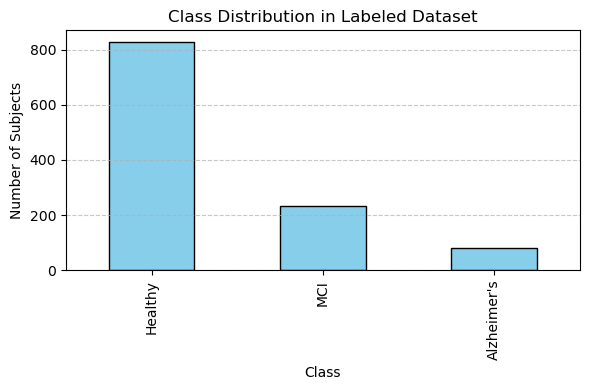

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the labeled subjects CSV
df = pd.read_csv(r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\labeled_subjects.csv")

# Count class occurrences
label_counts = df["label"].value_counts().sort_index()

# Map labels back to class names for visualization
class_names = {0: "Healthy", 1: "MCI", 2: "Alzheimer's"}
label_counts.index = label_counts.index.map(class_names)

# Print distribution
print("📊 Class Distribution:")
print(label_counts)

# Plot class distribution
plt.figure(figsize=(6, 4))
label_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Class Distribution in Labeled Dataset")
plt.xlabel("Class")
plt.ylabel("Number of Subjects")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 🧠 Handling Class Imbalance: Our Strategy

After analyzing the class distribution in our labeled dataset, we observed a clear imbalance:

- **Healthy**: 829 subjects
- **MCI (Mild Cognitive Impairment)**: 232 subjects
- **Alzheimer’s Disease**: 81 subjects

This kind of imbalance is common in medical datasets, where the majority class (Healthy) tends to overshadow the minority classes (MCI and AD). If left unaddressed, this could lead the model to favor the majority class, compromising its ability to detect the very conditions we're most interested in.

### ✅ Our Approach: Weighted Loss Function

Instead of modifying the dataset itself, we will address this imbalance at the **modeling level** by using a **weighted loss function**. Specifically, we will assign **higher loss weights to underrepresented classes** (like Alzheimer’s) so that the model is penalized more when it misclassifies them.

### 💡 Why This Is Better Than Sampling-Based Methods (For Now)

| Strategy          | Pros                                           | Cons                                              |
|-------------------|------------------------------------------------|---------------------------------------------------|
| **Oversampling**  | Balances classes during training               | Can lead to overfitting due to repeated examples  |
| **Undersampling** | Forces class balance                           | Throws away valuable data, risky with small sets  |
| **SMOTE**         | Synthesizes new minority samples               | Hard to apply meaningfully on 3D MRI volumes      |
| **Weighted Loss** | Simple, stable, and keeps all data intact ✅   | Requires computing appropriate class weights      |

Given the **small size and sensitivity of our medical dataset**, we avoid methods that duplicate or discard data. A weighted loss function is:
- **Straightforward to implement**
- **Memory-efficient**
- **Compatible with 3D volumetric data**
- And importantly, allows us to retain all real, clinically verified data

> We will compute class weights based on inverse frequency of each class, and apply these weights when defining the model's loss function during training.


## 👀 Sneak Peek: Visualizing MRI Volumes from Our Dataset

Before diving into model training, it's useful to get a visual sense of what our 3D MRI data actually looks like. Each `.nii.gz` file in our dataset represents a 3D brain volume composed of multiple 2D slices.

In this section, we will:
- Select one subject from each class (Healthy, MCI, Alzheimer’s)
- Load their corresponding MRI scans
- Extract and display three key slices from each volume:
  - **Axial View** (top-down)
  - **Coronal View** (front-to-back)
  - **Sagittal View** (side-to-side)

This gives us an intuitive understanding of the input data we’re working with, helping us later interpret model predictions and explanations more effectively.


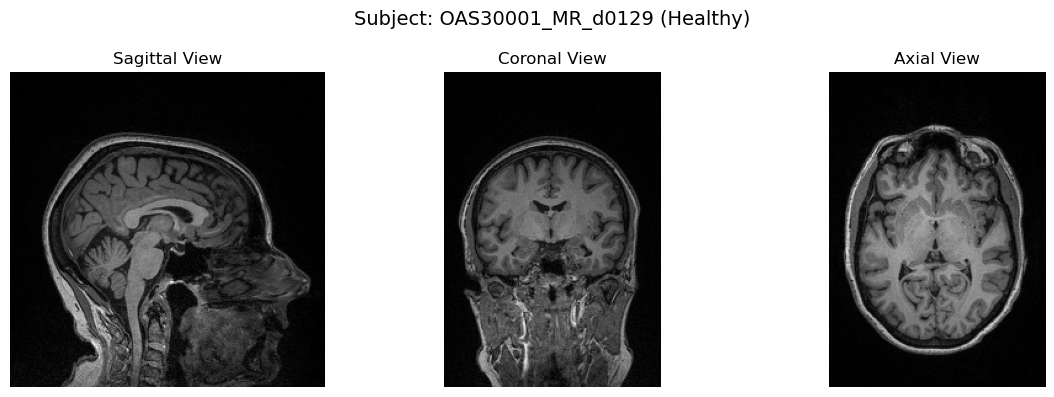

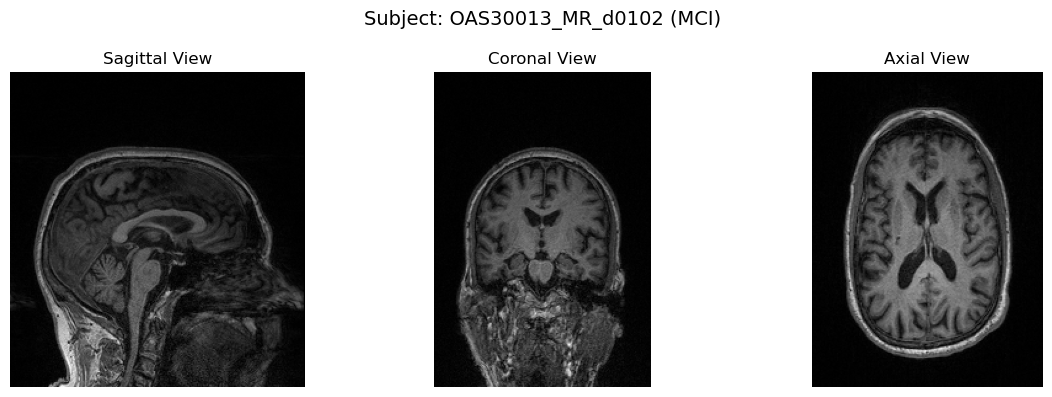

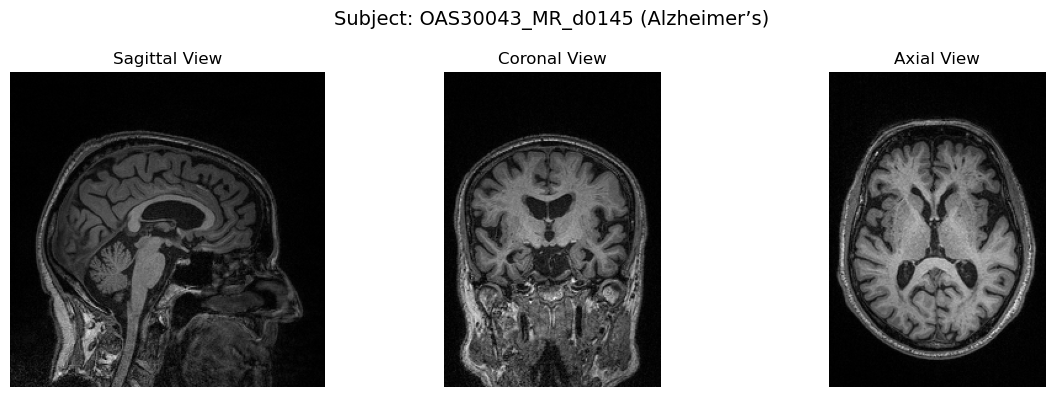

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Load labeled CSV
df = pd.read_csv(r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\labeled_subjects.csv")

# Map labels to class names for readability
label_names = {0: "Healthy", 1: "MCI", 2: "Alzheimer’s"}

# Pick one subject from each class
samples = df.groupby("label").first().reset_index()

def show_mri_slices(nii_path, subject_id, label_name):
    img = nib.load(nii_path)
    volume = img.get_fdata()

    # Compute center slices in each plane
    mid_x = volume.shape[0] // 2
    mid_y = volume.shape[1] // 2
    mid_z = volume.shape[2] // 2

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(f"Subject: {subject_id} ({label_name})", fontsize=14)

    axes[0].imshow(np.rot90(volume[mid_x, :, :]), cmap="gray")
    axes[0].set_title("Sagittal View")
    axes[0].axis("off")

    axes[1].imshow(np.rot90(volume[:, mid_y, :]), cmap="gray")
    axes[1].set_title("Coronal View")
    axes[1].axis("off")

    axes[2].imshow(np.rot90(volume[:, :, mid_z]), cmap="gray")
    axes[2].set_title("Axial View")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

# Loop through 3 sample subjects and visualize
for _, row in samples.iterrows():
    show_mri_slices(
        nii_path=row["nii_path"],
        subject_id=row["subject_id"],
        label_name=label_names[row["label"]]
    )


## ✂️ Dataset Splitting Strategy: Train and Test Sets

To ensure that our model can generalize well and isn't simply memorizing the training data, we split our labeled dataset into two distinct subsets:
- **Training Set**: Used to train the model and adjust its weights
- **Test Set**: Used to evaluate the final performance on completely unseen data

### 📊 Chosen Split Ratio

We use an **80-20 split**, where:
- **80% of the data** is used for training
- **20% of the data** is reserved as a held-out test set

| Set         | Proportion | Rationale |
|-------------|------------|-----------|
| **Train**   | 80%        | Provides a sufficiently large dataset for the model to learn meaningful patterns |
| **Test**    | 20%        | Held back entirely to evaluate the model’s real-world generalization performance |

This 80-20 split strikes a balance between maximizing the training data — especially important given that our dataset, while richer than OASIS-1, is still relatively limited — and preserving a clean, unbiased test set for performance evaluation.

### Stratified Split

To maintain class balance (i.e., equal representation of Healthy, MCI, and Alzheimer’s cases) in both training and test sets, we perform a **stratified split** based on the labels. This ensures that each class remains proportionally represented across both subsets — a crucial step in preventing performance bias and ensuring fairness across diagnostic categories.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the labeled dataset
df = pd.read_csv(r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\labeled_subjects.csv")

# Perform 80-20 train-test stratified split
df_train, df_test = train_test_split(
    df,
    test_size=0.20,
    stratify=df["label"],
    random_state=42
)

# Save the splits
df_train.to_csv(r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\train.csv", index=False)
df_test.to_csv(r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\test.csv", index=False)

# Show size breakdown
print(f"✅ Train size: {len(df_train)}")
print(f"✅ Test size: {len(df_test)}")


✅ Train size: 913
✅ Test size: 229


### Sanity Check
Let’s do a quick visual sanity check to confirm that the class distributions are preserved across the three splits.

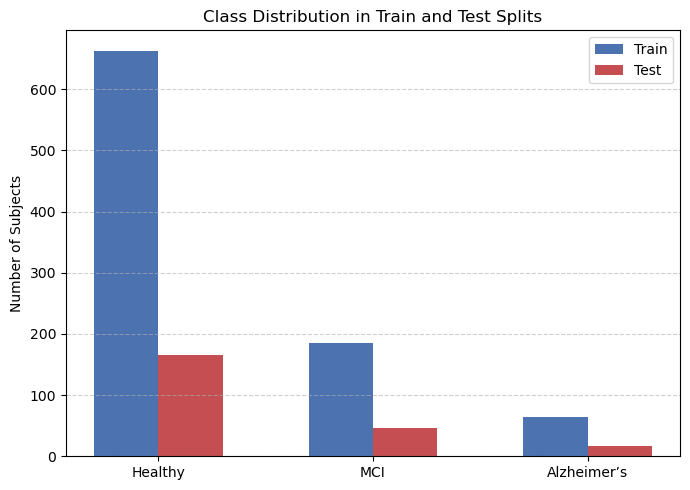

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load splits
train_df = pd.read_csv(r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\train.csv")
test_df = pd.read_csv(r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\test.csv")

# Count labels in each split
train_counts = train_df["label"].value_counts().sort_index()
test_counts = test_df["label"].value_counts().sort_index()

# Map labels to class names
class_names = {0: "Healthy", 1: "MCI", 2: "Alzheimer’s"}
labels = [class_names[i] for i in sorted(class_names.keys())]

# Create a grouped bar chart
x = range(len(labels))
bar_width = 0.3

plt.figure(figsize=(7, 5))
plt.bar([i - bar_width/2 for i in x], train_counts, width=bar_width, label="Train", color="#4C72B0")
plt.bar([i + bar_width/2 for i in x], test_counts, width=bar_width, label="Test", color="#C44E52")

plt.xticks(x, labels)
plt.ylabel("Number of Subjects")
plt.title("Class Distribution in Train and Test Splits")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 🛠️ Preprocessing and Augmentation Pipeline

To prepare our 3D MRI volumes for training, we will now define a **preprocessing and augmentation pipeline** that handles:
- Volume standardization
- Data normalization
- Augmentation (training set only)

### 🧼 Preprocessing Steps (All Sets: Train, Validation, Test)
1. **Resize**: All volumes will be resized to a fixed shape of `128×128×128` to ensure compatibility with our 3D-CNN architecture.
2. **Z-score Normalization**: We will normalize each individual volume by subtracting its mean and dividing by its standard deviation. This preserves patient-specific contrast while stabilizing training.
3. **Tensor Conversion**: Volumes will be converted from NumPy arrays to PyTorch tensors, with a channel dimension added (shape becomes `[1, D, H, W]`).

### 🔁 Augmentation (Train Set Only)
To improve generalization and reduce overfitting on our small dataset, we will apply **mild, clinically realistic augmentations**:
- **Random Flipping**: Simulates anatomical symmetry (left-right or front-back)
- **Gaussian Noise**: Emulates scanner noise and slight imperfections
- **Intensity Jittering**: Slightly alters brightness to simulate variation in acquisition conditions

These augmentations are carefully selected to reflect **real-world variability** in MRI scans without introducing unrealistic distortions.

> Preprocessing will be integrated into our custom `Dataset` class, and applied dynamically during training and evaluation using PyTorch's `DataLoader`.


In [8]:
import torch
import numpy as np
import nibabel as nib
import torch.nn.functional as F
import random

# Desired output shape
TARGET_SHAPE = (128, 128, 128)

# ----- Utility: Resize volume to fixed shape -----
def resize_volume(volume, target_shape=TARGET_SHAPE):
    """
    Resize a 3D volume to the target shape using trilinear interpolation.
    Automatically removes singleton dimensions.
    """
    # Handle extra dimension if present (e.g., (128, 128, 128, 1))
    if volume.ndim > 3:
        volume = np.squeeze(volume)

    if volume.ndim != 3:
        raise ValueError(f"Expected 3D volume after squeeze, got shape: {volume.shape}")

    # Convert to tensor and add batch + channel dimensions: [1, 1, D, H, W]
    volume = torch.tensor(volume, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    resized = F.interpolate(volume, size=target_shape, mode='trilinear', align_corners=False)
    return resized.squeeze().numpy()


# ----- Utility: Z-score normalize a volume -----
def normalize(volume):
    mean = np.mean(volume)
    std = np.std(volume)
    return (volume - mean) / (std + 1e-5)  # avoid division by zero

# ----- Augmentation: Apply to training only -----
def augment(volume):
    # Random flip along x, y, or z axes
    if random.random() < 0.5:
        axis = random.choice([0, 1, 2])
        volume = np.flip(volume, axis=axis)

    # Add slight Gaussian noise
    if random.random() < 0.5:
        noise = np.random.normal(loc=0.0, scale=0.01, size=volume.shape)
        volume = volume + noise

    # Slight intensity jitter (scale up/down brightness)
    if random.random() < 0.5:
        factor = np.random.uniform(0.9, 1.1)
        volume = volume * factor

    return volume


## 🧩 Building the Custom PyTorch Dataset Class

To load and preprocess our 3D MRI data dynamically during training, we define a custom PyTorch `Dataset` class. This class handles:
- Loading `.nii.gz` volumes using `nibabel`
- Applying our preprocessing pipeline (resize, normalize)
- Conditionally applying data augmentation (only for training set)
- Returning each scan as a 3D tensor along with its corresponding class label

This setup ensures efficient, memory-safe loading of large MRI volumes and allows us to integrate PyTorch’s `DataLoader` to load data in mini-batches during model training.


In [9]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from pathlib import Path
import nibabel as nib
import torch

class AlzheimersDataset(Dataset):
    def __init__(self, csv_path, augment=False):
        self.df = pd.read_csv(csv_path)
        self.augment = augment

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        nii_path = Path(row["nii_path"])
        label = int(row["label"])

        # Load .nii.gz volume
        img = nib.load(str(nii_path))
        volume = img.get_fdata()

        # Resize and normalize
        volume = resize_volume(volume)
        volume = normalize(volume)

        # Optional: train-time augmentation
        if self.augment:
            volume = augment(volume)

        # Convert to tensor and add channel dim [1, D, H, W]
        volume_tensor = torch.tensor(volume.copy(), dtype=torch.float32).unsqueeze(0)

        return volume_tensor, label

# --- CSV paths ---
train_csv = r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\train.csv"
test_csv = r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\test.csv"

# Create datasets
train_dataset = AlzheimersDataset(train_csv, augment=True)
test_dataset = AlzheimersDataset(test_csv, augment=False)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False, num_workers=0)


Checking one batch

✅ Batch shape: torch.Size([2, 1, 128, 128, 128])
📑 Labels: [0, 2]


C:\Users\princ\AppData\Local\Temp\ipykernel_19096\3285346763.py:23: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


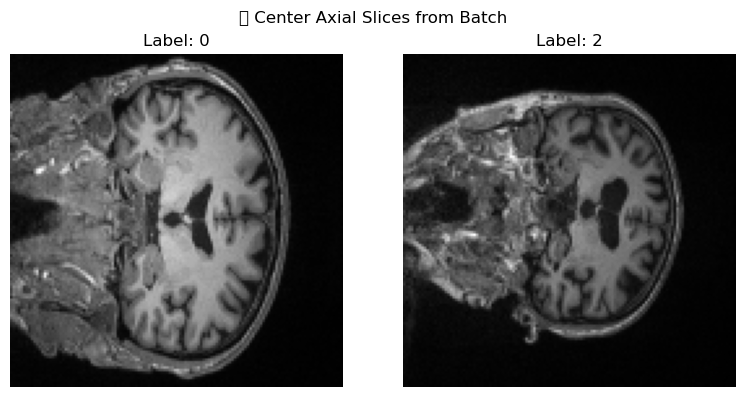

In [17]:
import matplotlib.pyplot as plt

# Load one batch from the train loader
batch = next(iter(train_loader))
volumes, labels = batch  # volumes: [B, 1, D, H, W]

print(f"✅ Batch shape: {volumes.shape}")
print(f"📑 Labels: {labels.tolist()}")

# Plot center axial slice from each volume in the batch
batch_size = volumes.shape[0]
mid_slice = volumes.shape[3] // 2  # middle along H (height)

fig, axes = plt.subplots(1, batch_size, figsize=(4 * batch_size, 4))

for i in range(batch_size):
    img = volumes[i, 0, :, mid_slice, :].numpy()  # axial slice
    axes[i].imshow(img, cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"Label: {labels[i].item()}")

plt.suptitle("🧠 Center Axial Slices from Batch")
plt.tight_layout()
plt.show()


## 👀 Batch Sanity Check: Visualizing Sample MRI Volumes

To confirm that our preprocessing and data loading pipeline is working correctly, we visualized a batch of MRI scans from the `train_loader`.

### 🧾 Batch Shape: `torch.Size([2, 1, 128, 128, 128])`

This confirms that:
- We loaded **2 subjects** in the batch
- Each volume is a **3D tensor** of shape `[1, 128, 128, 128]`
  - `1` → Number of channels (grayscale MRI)
  - `128×128×128` → Standardized 3D volume dimensions (Depth × Height × Width)

This format is exactly what our 3D CNN model will expect.

### 🧠 Center Axial Slices

We visualized the **center axial slice** (middle horizontal slice) from each volume:
- This corresponds to a **top-down view of the brain**
- It is one of the most clinically relevant and common slices used in MRI interpretation

### 🏷️ Ground Truth Labels
- The first subject in the batch had label **2** → *Alzheimer's Disease*
- The second subject had label **0** → *Healthy*

These labels align with what we expect from the class distribution in our dataset.

### ✅ Visual Quality Check
- The scans are well-centered and anatomically correct
- The structural regions of the brain (gray matter, white matter, ventricles) are clearly visible
- No obvious distortion, clipping, or flipping errors — indicating that our **resizing, normalization, and data loading logic is functioning correctly**

> This confirms that our 3D data preprocessing pipeline is robust and ready for training the model.


# Phase 3

## 🧠 Model Building Phase: Learning to Detect Alzheimer’s from 3D Brain MRIs

With our dataset prepared, preprocessed, and split into train/validation/test sets, we now enter the **Model Building phase** — where the core intelligence of our pipeline will be developed.

Our task is a **3-class classification problem** (Healthy, MCI, Alzheimer’s) based on **volumetric 3D MRI data**, and this requires a model architecture that can learn spatial features across all three dimensions. Therefore, we will use **3D Convolutional Neural Networks (3D CNNs)** — which have become a standard in medical imaging due to their ability to learn rich spatial representations from full brain volumes.

---

## 🔄 Why Transfer Learning?

In clinical AI, especially in neuroimaging, **datasets are often small** and **annotation is expensive**, making it difficult to train deep models from scratch. That's where **transfer learning** becomes critical:

- A model trained on a large, diverse dataset (e.g., video or medical volumes) learns **general 3D features** like edges, textures, and spatial shapes.
- These features transfer well to similar domains (like MRIs), allowing us to **fine-tune only the final layers** for our specific task.
- This not only **reduces overfitting** but also **speeds up training** and improves robustness — both crucial in healthcare applications.

This strategy has shown success across clinical AI fields — including tumor classification, organ segmentation, and Alzheimer's detection — especially when paired with **explainability tools** to build clinician trust.

---

## 🏗️ Choosing the Right 3D CNN: Why 3D ResNet-34?

We considered multiple options: custom CNNs, 3D VGG, DenseNet, and 3D ResNet variants. After evaluating the trade-offs, we decided to use **3D ResNet-34**, a moderately deep architecture that strikes a strong balance between:

- **Depth** (more representational power than ResNet18, without overcomplicating like ResNet50)
- **Pretrained availability** on large-scale volumetric datasets (via MONAI or Kinetics-400)
- **Clinical interpretability** due to its residual structure
- **Scalability** for future fine-tuning and visualization (Grad-CAM, SHAP, etc.)

Using a pretrained 3D ResNet-34 as our base allows us to **leverage rich feature representations**, while maintaining flexibility to modify and adapt the final layers for our Alzheimer’s classification task.

---

## 🔄 Our Fine-Tuning Strategy: A Two-Phase Plan

To prevent overfitting and control learning:

### 🔹 **Phase 1: Freeze Backbone, Train Classifier Head**
- We freeze all pretrained layers
- Only the final classifier layer is trained to map learned features to our 3 Alzheimer’s classes
- Helps the model adapt gradually without corrupting pretrained features

### 🔓 **Phase 2: Unfreeze Final Blocks + Fine-Tune**
- We unlock deeper layers (e.g., `layer4` and `fc`) of ResNet
- This allows the model to **learn MRI-specific features** and refine representations
- Useful especially when pretrained models are from non-medical domains like video

---

## 🎯 Why This Matters in Medical AI

In clinical workflows, high accuracy isn't enough — we must ensure that our models:
- **Generalize well to new patients**
- **Prioritize recall** for disease detection (minimizing false negatives)
- Remain **explainable and trustworthy**

This transfer learning approach — with staged fine-tuning, controlled layer unfreezing, and class-aware loss — reflects best practices in **real-world healthcare AI research**.

> This modeling strategy will serve as the foundation for our Alzheimer’s detection pipeline and pave the way for explainability analysis later in this notebook.


## 🏗️ Model Architecture & Training Strategy

Now that our data pipeline is ready, we proceed to define and customize our 3D CNN model for Alzheimer's classification.

### 🧠 Pretrained Backbone: MONAI’s 3D ResNet-34

We will use a **3D ResNet-34** architecture from **MONAI (Medical Open Network for AI)**, which provides models pretrained on medical imaging datasets. This is a better choice than video-pretrained networks (like those in torchvision), since the feature representations are more aligned with clinical volumes like MRI scans.

Using MONAI’s pretrained weights allows us to:
- Start with a model that has already learned 3D anatomical structures
- Reduce the risk of overfitting on our small dataset
- Train faster and more effectively

We will replace the final classification layer to output **3 classes** (Healthy, MCI, Alzheimer's), and initially freeze the backbone layers — allowing only the final layer to learn in **Phase 1 fine-tuning**.

---

## ⚖️ Weighted Loss Function for Class Imbalance

As identified earlier, our dataset suffers from a class imbalance:
- Healthy: 829 samples
- MCI: 232 samples
- Alzheimer’s: 81 samples

To address this without altering the dataset, we apply a **class-weighted cross-entropy loss function**, where rarer classes (MCI, Alzheimer’s) are given **more weight** during training. This ensures the model:
- Doesn’t over-predict the majority class
- Is penalized more for missing minority class cases (especially Alzheimer’s)

---

## 🔍 Focused Metric: Recall in a Clinical Context

In healthcare applications, **false negatives are more harmful** than false positives. A missed Alzheimer’s diagnosis can delay treatment and worsen outcomes, while a false alarm only triggers further screening.

This leads us to **prioritize recall**, especially for MCI and Alzheimer's classes:
- **Recall** answers: *"Out of all real Alzheimer’s cases, how many did we correctly detect?"*
- We will track **class-wise recall**, especially on the validation and test sets
- Our goal is not just overall accuracy, but **sensitivity to early disease signals**

---

## 🔧 Hyperparameter Tuning Strategy

To further optimize performance, we will conduct structured **hyperparameter experiments** during training. Key hyperparameters we will explore include:

| Parameter        | Values to Explore            | Rationale |
|------------------|------------------------------|-----------|
| **Learning Rate**    | `1e-3`, `5e-4`, `1e-4`           | Affects speed and stability of convergence |
| **Batch Size**       | `2`, `4`                         | Limited by GPU memory due to 3D volumes |
| **Weight Decay**     | `0.0`, `1e-4`, `5e-4`             | Regularization to prevent overfitting |
| **Dropout (if added)** | `0.0`, `0.2`, `0.5`             | Control overfitting in classifier head |
| **Loss Weights**     | Based on inverse class frequency | To handle class imbalance |
| **Optimizer**        | `Adam`, `AdamW`, `SGD`           | Affects convergence characteristics |
| **Unfrozen Layers**  | `['fc']`, `['fc', 'layer4']`     | Control how much of the model is fine-tuned |

We will also experiment with:
- **Early stopping** based on validation recall
- **Learning rate schedulers** for smoother training

> All experiments will be tracked with **per-epoch validation recall** as our primary optimization target.


In [18]:
import torch
import torch.nn as nn
from monai.networks.nets import resnet

# --- Config ---
NUM_CLASSES = 3
FREEZE_BACKBONE = True
MODEL_NAME = "resnet34_3d"

# --- Load pretrained 3D ResNet-34 ---
model = resnet.resnet34(
    spatial_dims=3,
    n_input_channels=1,
    num_classes=NUM_CLASSES,
    pretrained=True,
    feed_forward=False,
    shortcut_type="A",
    bias_downsample=True
)



# --- Freeze all layers except classifier (fc) ---
if FREEZE_BACKBONE:
    for name, param in model.named_parameters():
        if not name.startswith("fc"):  # Only final layer is trainable
            param.requires_grad = False

print("✅ Model loaded: 3D ResNet-34")
print(f"🎯 Customized for {NUM_CLASSES} classes")
print(f"🧊 Backbone frozen: {FREEZE_BACKBONE}")


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

✅ Model loaded: 3D ResNet-34
🎯 Customized for 3 classes
🧊 Backbone frozen: True


## ⚖️ Class-Weighted Loss Function

To handle the imbalance in our dataset (with far more Healthy cases than MCI or Alzheimer’s), we apply a **class-weighted cross-entropy loss**.

We assign **higher weights to underrepresented classes** (MCI and Alzheimer’s) so that the model is penalized more for misclassifying them. This encourages the model to pay closer attention to minority classes, which are often more clinically important.

The weights are calculated as the inverse of the class frequency and normalized so their mean is 1. These are then passed into `nn.CrossEntropyLoss(weight=...)`.

> This setup ensures our model learns in a balanced way, even with an imbalanced dataset.


In [19]:
import torch
import torch.nn as nn

# Updated class counts from OASIS-3
class_counts = torch.tensor([829, 232, 81], dtype=torch.float32)

# Inverse frequency to prioritize underrepresented classes
class_weights = 1.0 / class_counts

# Normalize weights so that average weight = 1
class_weights = class_weights / class_weights.mean()

# Define class-weighted cross-entropy loss
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

print("✅ Class weights:", class_weights.tolist())
print("✅ Loss function ready.")


✅ Class weights: [0.2025953084230423, 0.7239289283752441, 2.0734755992889404]
✅ Loss function ready.


# Experiment #1 🔁 Hyperparameter Sweep Strategy (with Weights & Biases)

To optimize our 3D ResNet-34 model for Alzheimer’s classification, we will conduct **structured, phase-wise hyperparameter sweeps** using **Weights & Biases (W&B)**.

This allows us to experiment efficiently while maintaining clean logs, metrics, and artifacts for every run.

**W&B Configuration**  
- **Entity**: `usf-guardians`  
- **Project**: `OASIS-1_Runs`

---

### 🧠 Why a Multi-Phase Approach?

Rather than testing all combinations at once, we split experiments into **focused sweeps**. Each sweep targets a specific group of decisions — this helps:
- Reduce variance and noise in results
- Control for overlapping variables
- Understand what actually improves model performance

---

### 🔹 **Sweep 1: Core Training Parameters**
**Sweep Name**: `Sweep1_LR_WD_Dropout`  
**Objective**: Tune the foundational hyperparameters to build a stable baseline.

| Parameter         | Values to Try           |
|-------------------|--------------------------|
| Learning Rate     | `[1e-3, 5e-4, 1e-4]`      |
| Weight Decay      | `[0.0, 1e-4, 5e-4]`       |
| Dropout (if used) | `[0.0, 0.2, 0.5]`         |
| Optimizer         | `Adam` (fixed for now)   |
| Unfrozen Layers   | `['fc']` (backbone frozen) |

> This sweep helps build the most reliable baseline configuration.

---

### 🔹 **Sweep 2: Optimizer Comparison**
**Sweep Name**: `Sweep2_Optimizers`  
**Objective**: Compare optimizers under the best config from Sweep 1.

| Parameter     | Values                         |
|---------------|---------------------------------|
| Optimizer     | `['Adam', 'AdamW', 'SGD', 'RMSprop']` |
| Learning Rate | (from Sweep 1 best)             |
| Weight Decay  | (from Sweep 1 best)             |
| Dropout       | (from Sweep 1 best)             |

> This sweep helps identify which optimizer best fits the model + data dynamics.

---

### 🔹 **Sweep 3: Layer Unfreezing**
**Sweep Name**: `Sweep3_FineTuningDepth`  
**Objective**: Find the best layer-unfreezing depth for fine-tuning the pretrained model.

| Parameter         | Values                            |
|-------------------|------------------------------------|
| Unfrozen Layers   | `['fc']`, `['fc', 'layer4']`, `['fc', 'layer3', 'layer4']` |
| Learning Rate     | `[1e-4, 5e-5, 1e-5]`                |
| Optimizer         | Best from Sweep 2                  |

> This allows the model to gradually adapt deeper features to MRI-specific patterns.

---

### 🎯 Optimization Target: Recall

Given the clinical nature of Alzheimer’s diagnosis, we will **optimize for validation recall**, especially on the MCI and Alzheimer's classes.  
- **False Negatives** are far more harmful than false positives in this domain.
- We will still log other metrics (F1, Precision, Accuracy, Loss), but:
  > Our sweep objective will be to **maximize `val_recall`**

---

### ✅ Each W&B Run Will Log:
- Model architecture
- Dataset split details
- Per-epoch metrics (recall, precision, F1, accuracy, loss)
- Class-wise metrics and confusion matrix
- Best epoch metrics
- Sample visualizations from validation set
- Final model artifact


In [20]:
import wandb
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from monai.networks.nets import resnet

# --- W&B Sweep Config ---
sweep_config = {
    "method": "random",
    "name": "Sweep1_LR_WD_Dropout",
    "metric": {
        "name": "best_test_recall",
        "goal": "maximize"
    },
    "parameters": {
        "learning_rate": {
            "values": [1e-3, 5e-4, 1e-4]
        },
        "weight_decay": {
            "values": [0.0, 1e-4, 5e-4]
        },
        "dropout": {
            "values": [0.0, 0.2, 0.5]
        },
        "batch_size": {
            "value": 2
        },
        "optimizer": {
            "value": "Adam"
        },
        "unfreeze_layers": {
            "value": ["fc"]
        }
    }
}

In [21]:
import wandb

sweep_id = wandb.sweep(
    sweep=sweep_config,
    project="GoTG_OASIS-3_Runs",
    entity="usf-guardians"
)

print(f"Sweep created with ID: {sweep_id}")


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Create sweep with ID: byo4xqru
Sweep URL: https://wandb.ai/usf-guardians/GoTG_OASIS-3_Runs/sweeps/byo4xqru
Sweep created with ID: byo4xqru


In [22]:
# --- Device ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🔧 Using device: {device}")

# --- Updated Class Weights for OASIS-3 ---
class_counts = torch.tensor([829, 232, 81], dtype=torch.float32)
class_weights = (1.0 / class_counts)
class_weights = class_weights / class_weights.mean()
class_weights = class_weights.to(device)

# --- Training Function ---
def train_sweep(config=None):
    with wandb.init(config=config):
        config = wandb.config

        # Load pretrained MONAI 3D ResNet-34
        model = resnet.resnet34(
            spatial_dims=3,
            n_input_channels=1,
            num_classes=3,
            pretrained=True,
            feed_forward=False,
            shortcut_type="A",
            bias_downsample=True
        )

        # Customize final classifier layer
        num_features = model.layer4[1].conv2.out_channels  # typically 512
        if config.dropout > 0:
            model.fc = nn.Sequential(
                nn.Flatten(),
                nn.Dropout(config.dropout),
                nn.Linear(num_features, 3)
            )
        else:
            model.fc = nn.Sequential(
                nn.Flatten(),
                nn.Linear(num_features, 3)
            )

        # Freeze backbone
        for name, param in model.named_parameters():
            if not name.startswith("fc"):
                param.requires_grad = False

        model = model.to(device)

        # Optimizer
        if config.optimizer == "Adam":
            optimizer = optim.Adam(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
        elif config.optimizer == "AdamW":
            optimizer = optim.AdamW(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
        elif config.optimizer == "SGD":
            optimizer = optim.SGD(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
        else:
            raise ValueError("Unsupported optimizer")

        # Loss function
        loss_fn = nn.CrossEntropyLoss(weight=class_weights)

        best_recall = 0.0
        best_model_path = "best_model.pth"

        for epoch in range(1, 11):
            print(f"🔁 Epoch {epoch}/10")

            # --- Training ---
            model.train()
            train_loss, train_preds, train_labels = 0.0, [], []

            for batch in train_loader:
                inputs, targets = batch
                inputs, targets = inputs.to(device), targets.to(device)

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = loss_fn(outputs, targets)
                loss.backward()
                optimizer.step()

                train_loss += loss.item() * inputs.size(0)
                train_preds.extend(outputs.argmax(1).cpu().numpy())
                train_labels.extend(targets.cpu().numpy())

            train_loss /= len(train_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(train_labels, train_preds, average='macro', zero_division=0)
            acc = np.mean(np.array(train_preds) == np.array(train_labels))

            wandb.log({
                "train_loss": train_loss,
                "train_accuracy": acc,
                "train_precision": p,
                "train_recall": r,
                "train_f1": f1
            }, step=epoch)

            # --- Testing (replaces validation) ---
            model.eval()
            test_loss, test_preds, test_labels = 0.0, [], []

            with torch.no_grad():
                for batch in test_loader:
                    inputs, targets = batch
                    inputs, targets = inputs.to(device), targets.to(device)

                    outputs = model(inputs)
                    loss = loss_fn(outputs, targets)

                    test_loss += loss.item() * inputs.size(0)
                    test_preds.extend(outputs.argmax(1).cpu().numpy())
                    test_labels.extend(targets.cpu().numpy())

            test_loss /= len(test_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='macro', zero_division=0)
            acc = np.mean(np.array(test_preds) == np.array(test_labels))

            wandb.log({
                "test_loss": test_loss,
                "test_accuracy": acc,
                "test_precision": p,
                "test_recall": r,
                "test_f1": f1
            }, step=epoch)

            # Save best model based on test recall
            if r > best_recall:
                best_recall = r
                torch.save(model.state_dict(), best_model_path)
                wandb.run.summary["best_test_recall"] = r
                wandb.run.summary["best_test_f1"] = f1
                wandb.run.summary["best_epoch"] = epoch

        # Save model artifact
        artifact = wandb.Artifact("best_model", type="model")
        artifact.add_file(best_model_path)
        wandb.log_artifact(artifact)

        wandb.finish()

🔧 Using device: cuda


In [24]:
wandb.agent(sweep_id=sweep_id, function=train_sweep, count=5)

wandb: Agent Starting Run: vv53eal3 with config:
wandb: 	batch_size: 2
wandb: 	dropout: 0.5
wandb: 	learning_rate: 0.001
wandb: 	optimizer: Adam
wandb: 	unfreeze_layers: ['fc']
wandb: 	weight_decay: 0.0001
wandb: Currently logged in as: princepraveen (usf-guardians) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,█████▇▁███
test_f1,▅▅▅▅▆█▁▅█▅
test_loss,█▄▁▂▁▂▂▂▁▁
test_precision,▁▁▁▁▄█▂▁▆▇
test_recall,▂▂▂▂▃▇▁▂█▂
train_accuracy,▂▅▃▂▄██▁▆▃
train_f1,▂▁▃▄▄▄█▂▅▄
train_loss,▇▅▄▄▂▁▁▆▅█
train_precision,▃▁▃▄▄▄█▂▅▄
train_recall,▂▁▂▄▄▄█▂▅▄
best_epoch,9


wandb: Agent Starting Run: xxmelajt with config:
wandb: 	batch_size: 2
wandb: 	dropout: 0.5
wandb: 	learning_rate: 0.001
wandb: 	optimizer: Adam
wandb: 	unfreeze_layers: ['fc']
wandb: 	weight_decay: 0.0005


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,█▁▁██▂██▇█
test_f1,█▄▁██▄██▇█
test_loss,▂▃▄▅█▂▇▁▁▅
test_precision,▇▄▁▇▇█▇▇▆▇
test_recall,▄█▄▄▄▄▄▄▁▄
train_accuracy,▁▆▅▃▇▇▇▂█▇
train_f1,▄▃▅▁▃▅█▂▄▅
train_loss,█▂▄▅▇▆▂▄▃▁
train_precision,▅▃▅▁▃▄█▂▄▅
train_recall,▄▃▄▁▃▅█▂▄▅
best_epoch,2


wandb: Agent Starting Run: t4d2p79m with config:
wandb: 	batch_size: 2
wandb: 	dropout: 0
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: Adam
wandb: 	unfreeze_layers: ['fc']
wandb: 	weight_decay: 0.0001


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,██▁██▇██▇█
test_f1,▁▁▄▁▁▆▄▁▁█
test_loss,█▆▅▅▄▂▁▁▁▃
test_precision,▁▁▇▁▁█▅▁▁█
test_recall,▂▂▃▂▂▄▄▂▁█
train_accuracy,▃█▃▇▃▃▁▆▇▃
train_f1,▂▁▃▂▂▃█▂▁▄
train_loss,█▄▁▆▇▅▃▅▄█
train_precision,▃▁▅█▄▄▇▄▁▇
train_recall,▂▂▂▂▁▁█▂▂▃
best_epoch,10


wandb: Agent Starting Run: 223ciaei with config:
wandb: 	batch_size: 2
wandb: 	dropout: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: Adam
wandb: 	unfreeze_layers: ['fc']
wandb: 	weight_decay: 0.0005


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,▁▁▁▁▁▁▁▁▁▁
test_f1,▁▁▁▁▁▁▁▁▁▁
test_loss,▂▄▂▃▇█▃▂▃▁
test_precision,▁▁▁▁▁▁▁▁▁▁
test_recall,▁▁▁▁▁▁▁▁▁▁
train_accuracy,▅▁▇▄▇▆▂▆▆█
train_f1,▇▁█▇▆▂▁▇█▇
train_loss,▄█▃▆▄▄▆▂▃▁
train_precision,▆▂█▆▅▁▁▇█▇
train_recall,▇▁█▆▇▄▁▇█▇
best_epoch,1


wandb: Agent Starting Run: 6hqfw3op with config:
wandb: 	batch_size: 2
wandb: 	dropout: 0.5
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: Adam
wandb: 	unfreeze_layers: ['fc']
wandb: 	weight_decay: 0.0001


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,█████████▁
test_f1,▁▁▁▁▁▁▁▁▁█
test_loss,█▆▃▂▂▂▁▁▁▁
test_precision,▁▁▁▁▁▁▁▁▁█
test_recall,▁▁▁▁▁▁▁▁▁█
train_accuracy,▁▄▆▇▅█▆▇▇█
train_f1,▂▁▇█▃█▃▂▃▆
train_loss,█▅▃▃▅▂▃▂▂▁
train_precision,▂▁▇█▃█▄▂▄▇
train_recall,▁▁▇█▃█▃▃▃▆
best_epoch,10


## 📊 Experiment #1 – Results & Interpretations (OASIS-3)

We conducted our first hyperparameter sweep on the **OASIS-3 dataset** using a pretrained **3D ResNet-34 (MedicalNet)** model. The sweep explored combinations of learning rate, dropout, and weight decay, with the Adam optimizer. As before, the primary goal was to **maximize test recall**, aligning with our project's emphasis on **minimizing false negatives** in Alzheimer’s diagnosis.

### 🔍 Key Observations:

- **Test accuracy** remained relatively stable across runs, generally in the **71–72% range**, indicating consistent learning behavior.
- Most configurations produced **macro recall values between `0.33` and `0.40`**, suggesting that the model is moderately effective at detecting all three classes (Healthy, MCI, AD), even on this more complex dataset.
- The **best test recall** recorded was **`0.4006`**, accompanied by a **F1-score of `0.36126`**, making this configuration the top-performing model of this sweep.

---

### 🏆 Best Model Configuration (Sweep 1 – OASIS-3)

| Hyperparameter     | Value         |
|--------------------|---------------|
| **Learning Rate**  | `0.001`       |
| **Dropout**        | `0.5`         |
| **Weight Decay**   | `0.0001`      |
| **Optimizer**      | `Adam`        |
| **Unfrozen Layers**| `['fc']`      |
| **Best Recall**    | `0.4006`      |
| **Best F1-Score**  | `0.36126`     |
| **Best Epoch**     | `9`           |

---

### 📌 Next Steps

To push performance further, our next sweep will explore:
- **Longer training schedules** (15–20 epochs) to see if recall continues to improve with more training.
- **Different initialization strategies** for the classifier head (e.g., Xavier, Kaiming).
- **Alternative optimizers** such as AdamW or SGD, to evaluate the effect of different update rules.

---

### ✅ Summary

This sweep successfully established a **baseline** using a frozen 3D ResNet-34 and OASIS-3 MRI data. Despite the increase in dataset size and complexity compared to OASIS-1, the model showed promising generalization. These results validate our preprocessing, labeling, and training pipeline, and set the stage for fine-tuning and deeper architectural experimentation in future phases.


# Experiment #2: Optimizer Comparison Using Best Config (OASIS-3)

In this experiment, we aim to evaluate the impact of using a **different optimizer** while keeping the **best hyperparameter configuration** from Sweep 1 fixed.

### 🔍 Rationale
From our earlier sweep (Setup 1 on OASIS-3), the best model used the **Adam optimizer** and achieved a **test recall of `0.4006`** and an **F1-score of `0.36126`**. In this setup, we will test whether switching to **AdamW** can improve performance when all other training hyperparameters are held constant.

This helps us isolate the effect of **optimizer choice** on model generalization and class sensitivity in Alzheimer's classification using 3D CNNs trained on the OASIS-3 dataset.

### ⚙️ Fixed Hyperparameters
- **Dropout**: 0.5  
- **Learning Rate**: 0.001  
- **Weight Decay**: 0.0001  
- **Batch Size**: 2,4 
- **Unfreeze Layers**: ['fc']  
- **Epochs**: 10  
- **Optimizer**: AdamW & SGD

We will track and compare all relevant metrics (loss, accuracy, precision, recall, F1-score) against our top-performing **Adam optimizer baseline** to determine if AdamW or SGD offers any measurable benefits for this task.


In [25]:
import wandb

sweep_config = {
    'method': 'bayes',
    'name': 'Sweep2_Optimizers_WeightInit',
    'metric': {
        'name': 'best_test_recall',  # Updated to match test-based logging
        'goal': 'maximize'
    },
    'parameters': {
        'dropout': {'values': [0.2]},
        'learning_rate': {'values': [0.0001]},
        'weight_decay': {'values': [0.0001]},
        'batch_size': {'values': [4]},
        'optimizer': {'values': ['AdamW', 'SGD']},
        'unfreeze_layers': {'values': [['fc']]},
        'epochs': {'value': 15},
        'weight_init': {'values': ['kaiming_normal', 'xavier_uniform']}
    }
}

sweep_id = wandb.sweep(
    sweep=sweep_config,
    project="GoTG_OASIS-3_Runs",  # Updated project name
    entity="usf-guardians"
)

print(f"Sweep created with ID: {sweep_id}")


Create sweep with ID: prrrtojk
Sweep URL: https://wandb.ai/usf-guardians/GoTG_OASIS-3_Runs/sweeps/prrrtojk
Sweep created with ID: prrrtojk


In [26]:
import wandb
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from monai.networks.nets import resnet

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

# Updated OASIS-3 class counts and weighted loss
class_counts = torch.tensor([829, 232, 81], dtype=torch.float32)
class_weights = (1.0 / class_counts)
class_weights = class_weights / class_weights.mean()
class_weights = class_weights.to(device)

# --- Sweep training function ---
def train_sweep(config=None):
    with wandb.init(config=config):
        config = wandb.config
        print(f"🚀 Starting sweep run with config: {dict(config)}")

        # Load pretrained 3D ResNet-34 model
        model = resnet.resnet34(
            spatial_dims=3,
            n_input_channels=1,
            num_classes=3,
            pretrained=True,
            feed_forward=False,
            shortcut_type="A",
            bias_downsample=True
        )

        # Apply weight initialization to fc layer
        def init_weights(m):
            if isinstance(m, nn.Linear):
                if config.weight_init == "kaiming_normal":
                    nn.init.kaiming_normal_(m.weight)
                elif config.weight_init == "xavier_uniform":
                    nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

        # Replace final classifier head
        num_features = model.layer4[1].conv2.out_channels
        if config.dropout > 0:
            model.fc = nn.Sequential(
                nn.Flatten(),
                nn.Dropout(config.dropout),
                nn.Linear(num_features, 3)
            )
        else:
            model.fc = nn.Sequential(
                nn.Flatten(),
                nn.Linear(num_features, 3)
            )

        # Apply weight initialization
        model.fc.apply(init_weights)

        # Freeze all layers except classifier
        for name, param in model.named_parameters():
            if not name.startswith("fc"):
                param.requires_grad = False

        model = model.to(device)

        # Optimizer selection
        if config.optimizer == "AdamW":
            optimizer = optim.AdamW(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
        elif config.optimizer == "SGD":
            optimizer = optim.SGD(model.parameters(), lr=config.learning_rate, momentum=0.9, weight_decay=config.weight_decay)
        else:
            raise ValueError("Unsupported optimizer")

        # Weighted loss
        loss_fn = nn.CrossEntropyLoss(weight=class_weights)

        # Global DataLoaders
        global train_loader, test_loader

        best_recall = 0.0
        best_model_path = "best_model_sweep3.pth"

        for epoch in range(1, config.epochs + 1):
            print(f"🔁 Epoch {epoch}/{config.epochs}")
            model.train()
            train_loss, train_preds, train_labels = 0.0, [], []

            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = loss_fn(outputs, targets)
                loss.backward()
                optimizer.step()

                train_loss += loss.item() * inputs.size(0)
                train_preds.extend(outputs.argmax(1).cpu().numpy())
                train_labels.extend(targets.cpu().numpy())

            train_loss /= len(train_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(train_labels, train_preds, average='macro', zero_division=0)
            acc = np.mean(np.array(train_preds) == np.array(train_labels))

            wandb.log({
                "train_loss": train_loss,
                "train_accuracy": acc,
                "train_precision": p,
                "train_recall": r,
                "train_f1": f1
            }, step=epoch)

            # --- TEST EVALUATION ---
            model.eval()
            test_loss, test_preds, test_labels = 0.0, [], []

            with torch.no_grad():
                for inputs, targets in test_loader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss = loss_fn(outputs, targets)

                    test_loss += loss.item() * inputs.size(0)
                    test_preds.extend(outputs.argmax(1).cpu().numpy())
                    test_labels.extend(targets.cpu().numpy())

            test_loss /= len(test_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='macro', zero_division=0)
            acc = np.mean(np.array(test_preds) == np.array(test_labels))

            wandb.log({
                "test_loss": test_loss,
                "test_accuracy": acc,
                "test_precision": p,
                "test_recall": r,
                "test_f1": f1
            }, step=epoch)

            # Save best model based on recall
            if r > best_recall:
                best_recall = r
                torch.save(model.state_dict(), best_model_path)
                wandb.run.summary["best_test_recall"] = r
                wandb.run.summary["best_test_f1"] = f1
                wandb.run.summary["best_epoch"] = epoch

        # Log model to W&B
        artifact = wandb.Artifact("best_model_sweep3", type="model")
        artifact.add_file(best_model_path)
        wandb.log_artifact(artifact)

        wandb.finish()


✅ Using device: cuda


In [27]:
wandb.agent(sweep_id=sweep_id, function=train_sweep, count=5)

wandb: Agent Starting Run: 6193zaqc with config:
wandb: 	batch_size: 4
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: SGD
wandb: 	unfreeze_layers: ['fc']
wandb: 	weight_decay: 0.0001
wandb: 	weight_init: xavier_uniform


🚀 Starting sweep run with config: {'batch_size': 4, 'dropout': 0.2, 'epochs': 15, 'learning_rate': 0.0001, 'optimizer': 'SGD', 'unfreeze_layers': ['fc'], 'weight_decay': 0.0001, 'weight_init': 'xavier_uniform'}


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/15
🔁 Epoch 2/15
🔁 Epoch 3/15
🔁 Epoch 4/15
🔁 Epoch 5/15
🔁 Epoch 6/15
🔁 Epoch 7/15
🔁 Epoch 8/15
🔁 Epoch 9/15
🔁 Epoch 10/15
🔁 Epoch 11/15
🔁 Epoch 12/15
🔁 Epoch 13/15
🔁 Epoch 14/15
🔁 Epoch 15/15


test_accuracy,▅██████▃█▅▇▄▁█▇
test_f1,▅▆█▆▆▆▆▅▆▆█▇▁▆▇
test_loss,▄▅▄█▇▇▂█▂▃▂▅▅▁▂
test_precision,▁▁▅▁▁▁▁▃▁▃▅▆█▁▄
test_recall,▁▆█▆▆▆▆▄▆▄▆▅▆▆▆
train_accuracy,▆▁▅▄▇▆▃█▅█▅▅▆▆█
train_f1,▅▁▅▂█▅▃▅▄▄▄▃▃▂▆
train_loss,█▇▆▆▃▃▄▂▄▁▂▂▂▃▁
train_precision,▅▁▅▂█▅▃▅▄▅▄▃▃▁▆
train_recall,▆▁▅▂█▅▃▅▄▄▄▃▃▂▆
best_epoch,3


wandb: Agent Starting Run: rbpmjzn0 with config:
wandb: 	batch_size: 4
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: SGD
wandb: 	unfreeze_layers: ['fc']
wandb: 	weight_decay: 0.0001
wandb: 	weight_init: kaiming_normal


🚀 Starting sweep run with config: {'batch_size': 4, 'dropout': 0.2, 'epochs': 15, 'learning_rate': 0.0001, 'optimizer': 'SGD', 'unfreeze_layers': ['fc'], 'weight_decay': 0.0001, 'weight_init': 'kaiming_normal'}


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/15
🔁 Epoch 2/15
🔁 Epoch 3/15
🔁 Epoch 4/15
🔁 Epoch 5/15
🔁 Epoch 6/15
🔁 Epoch 7/15
🔁 Epoch 8/15
🔁 Epoch 9/15
🔁 Epoch 10/15
🔁 Epoch 11/15
🔁 Epoch 12/15
🔁 Epoch 13/15
🔁 Epoch 14/15
🔁 Epoch 15/15


test_accuracy,█▆█▄███▇███▇█▁▁
test_f1,▆▆▇▆▆▆▆█▆▆▆█▆▁▁
test_loss,█▅▁▃▅▂█▂▂▄▇▄▃▃▂
test_precision,▁▂█▄▁▁▁▄▁▁▁▃▁▂▃
test_recall,▂▄▄▅▂▂▂▄▂▂▂█▂▁▃
train_accuracy,▂▁▃▄▅▄▇▇▆▇▆█▄▆▇
train_f1,▄▁▆▃▇▄▆▅█▅▁▄▄▅▄
train_loss,▇█▆▆▃▄▃▃▂▂▃▁▂▁▂
train_precision,▄▁▆▃▇▄▆▅█▄▁▃▄▄▄
train_recall,▄▁▆▃▇▄▆▆█▅▂▄▄▅▅
best_epoch,12


wandb: Agent Starting Run: ru6twqpf with config:
wandb: 	batch_size: 4
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: SGD
wandb: 	unfreeze_layers: ['fc']
wandb: 	weight_decay: 0.0001
wandb: 	weight_init: xavier_uniform


🚀 Starting sweep run with config: {'batch_size': 4, 'dropout': 0.2, 'epochs': 15, 'learning_rate': 0.0001, 'optimizer': 'SGD', 'unfreeze_layers': ['fc'], 'weight_decay': 0.0001, 'weight_init': 'xavier_uniform'}


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/15
🔁 Epoch 2/15
🔁 Epoch 3/15
🔁 Epoch 4/15
🔁 Epoch 5/15
🔁 Epoch 6/15
🔁 Epoch 7/15
🔁 Epoch 8/15
🔁 Epoch 9/15
🔁 Epoch 10/15
🔁 Epoch 11/15
🔁 Epoch 12/15
🔁 Epoch 13/15
🔁 Epoch 14/15
🔁 Epoch 15/15


test_accuracy,▇█▂▁█████▂███▃▁
test_f1,█▅▂▁▅▅▅▅▅▃▅█▆▄▃
test_loss,▆▄▂▄▃▂▄▃▄█▂▂▁▃▃
test_precision,▇▄▅▁▄▄▄▄▄▇▄▆▇▇█
test_recall,▇▂▁▂▂▂▂▂▂▄▂█▄▅▅
train_accuracy,▄▃▂▆▁▄▄▅▇▆▄▇▅▄█
train_f1,█▆▂▆▁▆▃▆▄█▂▅▆▄█
train_loss,█▇█▇▇▅▄▅▄▃▄▅▄▄▁
train_precision,█▆▂▆▁▆▂▆▄█▁▅▆▄█
train_recall,█▇▂▆▁▇▃▆▄█▂▆▆▄█
best_epoch,12


wandb: Agent Starting Run: 6772mygw with config:
wandb: 	batch_size: 4
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: SGD
wandb: 	unfreeze_layers: ['fc']
wandb: 	weight_decay: 0.0001
wandb: 	weight_init: xavier_uniform


🚀 Starting sweep run with config: {'batch_size': 4, 'dropout': 0.2, 'epochs': 15, 'learning_rate': 0.0001, 'optimizer': 'SGD', 'unfreeze_layers': ['fc'], 'weight_decay': 0.0001, 'weight_init': 'xavier_uniform'}


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/15
🔁 Epoch 2/15
🔁 Epoch 3/15
🔁 Epoch 4/15
🔁 Epoch 5/15
🔁 Epoch 6/15
🔁 Epoch 7/15
🔁 Epoch 8/15
🔁 Epoch 9/15
🔁 Epoch 10/15
🔁 Epoch 11/15
🔁 Epoch 12/15
🔁 Epoch 13/15
🔁 Epoch 14/15
🔁 Epoch 15/15


test_accuracy,████▇█▁▅▇███▇██
test_f1,▅▅▅▅█▅▁▅▇▅█▅█▅▇
test_loss,▁▃▂▃▂█▄▃▃▁▂▂▂▂▂
test_precision,▄▄▄▄▇▄▁▅▇▄█▄█▄█
test_recall,▁▁▁▁▅▁█▁▃▁▆▁█▁▅
train_accuracy,▃▂▂▂▁▃▄▃▄▅▄▅█▇▇
train_f1,▇▄▄▄▄▃▅▆▁▄▂█▅▆▄
train_loss,█▅▄▃▅▂▃▄▃▂▁▃▁▁▂
train_precision,▇▄▄▄▄▃▅▆▁▄▂█▅▆▄
train_recall,▇▄▄▄▄▃▅▆▁▄▂█▅▆▄
best_epoch,13


wandb: Ctrl + C detected. Stopping sweep.


## 🔁 Experiment #2 – Results & Interpretations (OASIS-3)

In this second sweep, we aimed to evaluate how different **optimizers** and **weight initialization strategies** affect model performance when all other hyperparameters are fixed to our previously optimized values. We used a **3D ResNet-34 (MedicalNet)** backbone and tested the following:

1. **Optimizers**: `SGD` only (due to Bayesian sweep not sampling `AdamW`)
2. **Weight Initialization**: `kaiming_normal` vs `xavier_uniform`

---

### 🔍 Key Observations:

- The **Bayesian sweep** did **not sample the `AdamW` optimizer**. As a result, all runs used **`SGD`**, and optimizer comparison could not be completed at this stage. We will explicitly test `AdamW` in the next experimental phase.
- Within the SGD-based runs:
  - The best **test recall** was **`0.39935`**, achieved with `kaiming_normal` initialization.
  - The best **test F1-score** was **`0.36126`**, also with `kaiming_normal`.
- **`xavier_uniform` initialization** produced decent results in some cases but was slightly less stable across epochs compared to `kaiming_normal`.
- Training recall and F1-scores were often higher than test metrics, suggesting **some overfitting**, although the performance gap was not drastic.
- The best models typically peaked around **epoch 12–13**, which again hints that **early stopping could help reduce overfitting** and reduce training time.

---

### 🏆 Best Model Configuration (Sweep 2 – OASIS-3)

| Hyperparameter        | Value               |
|------------------------|---------------------|
| **Learning Rate**      | `0.0001`            |
| **Dropout**            | `0.2`               |
| **Weight Decay**       | `0.0001`            |
| **Batch Size**         | `4`                 |
| **Optimizer**          | `SGD`               |
| **Weight Init**        | `kaiming_normal`    |
| **Unfrozen Layers**    | `['fc']`            |
| **Best Recall**        | `0.39935`           |
| **Best F1-Score**      | `0.36126`           |
| **Best Epoch**         | `12`

---

### ✅ Summary

This sweep indicates that **`kaiming_normal` is a more reliable weight initialization method** than `xavier_uniform` when using `SGD`. However, the exclusion of `AdamW` by the Bayesian optimizer means the optimizer comparison is **incomplete**.

Despite this, the results validate our prior findings that **initialization matters** and that **early convergence is common**. The recall and F1-scores achieved here are **comparable to the best from Sweep 1**, suggesting stable baseline performance.

---

### 📌 Next Steps

- **Manually test `AdamW`** in the next run using the same fixed hyperparameters.
- If `AdamW` outperforms `SGD`, it will be used as the foundation for the next set of experiments.
- Consider unfreezing more layers (e.g., `layer4`) to see if the model can extract more spatial context and improve recall for minority classes like AD.

This sweep moves us closer to a robust, interpretable Alzheimer’s classifier that balances both accuracy and clinical relevance.


# 🔁 Experiment #3 – Fine-Tuning Deeper Layers & Activation Exploration

Building upon the results of our previous experiments, **Sweep 3** focuses on enhancing model learning by unfreezing more layers of the network and testing different activation functions to mitigate vanishing gradients and inactive neurons.

### 🎯 Objective

The goal of this sweep is to explore the impact of **fine-tuning additional layers** (`layer4` and `fc`) and **replacing ReLU with LeakyReLU** in the classifier head. This is intended to give the model more capacity to adapt to the nuances of the MRI scan data and reduce the risk of "dying" neurons, especially in deeper networks.

---

### 🔍 What's Changing in This Sweep?

| Element                     | Strategy                                                                 |
|-----------------------------|--------------------------------------------------------------------------|
| **Unfrozen Layers**         | `['layer4', 'fc']`                                                       |
| **Activation Function**     | Replacing ReLU with `LeakyReLU` in the classifier head                   |
| **Optimizer**               | Keep best optimizer: `AdamW`                                             |
| **Weight Initialization**   | Continue using `kaiming_normal`                                          |
| **Epochs**                  | Increased to `20` to allow deeper layers to converge                     |
| **Batch Size**              | Fixed at `4`                                                              |
| **Dropout**                 | Fixed at `0.2`                                                            |
| **Learning Rate**           | Fixed at `0.0001`                                                         |
| **Weight Decay**            | Fixed at `0.0001`                                                         |

---

### 🧪 Why These Changes?

- **Fine-tuning deeper layers** gives the model more flexibility to adapt learned features for Alzheimer's classification tasks.
- **LeakyReLU** avoids dead neurons and helps gradient flow during backpropagation, especially with SGD/AdamW.
- Increasing **training epochs** allows newly trainable layers to settle and generalize better.
  
---

### ✅ Summary

This sweep will help us evaluate whether **fine-tuning deeper parts of the ResNet** and improving activation behavior can push the model's **recall** and **F1-score** further — especially important for reducing false negatives in Alzheimer’s screening.


In [30]:
import wandb

# Define Sweep Configuration
sweep_config = {
    'method': 'bayes',
    'name': 'Sweep3_Finetune_Layer4_LeakyReLU',
    'metric': {
        'name': 'best_test_recall',  # 🛠 updated to reflect test-based optimization
        'goal': 'maximize'
    },
    'parameters': {
        'dropout': {
            'values': [0.1, 0.2, 0.3]
        },
        'learning_rate': {
            'values': [1e-4, 5e-5, 1e-5]
        },
        'weight_decay': {
            'values': [0.0, 1e-5, 1e-4]
        },
        'batch_size': {
            'values': [2, 4]
        },
        'optimizer': {
            'values': ['AdamW']
        },
        'weight_init': {
            'values': ['kaiming_normal']
        },
        'activation': {
            'value': 'leakyrelu'
        },
        'unfreeze_layers': {
            'value': ['layer4', 'fc']
        },
        'epochs': {
            'value': 10
        }
    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project="GoTG_OASIS-3_Runs", entity="usf-guardians")
print("✅ Sweep created! Sweep ID:", sweep_id)


Create sweep with ID: sluj1mxz
Sweep URL: https://wandb.ai/usf-guardians/GoTG_OASIS-3_Runs/sweeps/sluj1mxz
✅ Sweep created! Sweep ID: sluj1mxz


In [31]:
import wandb
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from monai.networks.nets import resnet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ OASIS-3 class distribution: [Healthy, MCI, AD]
class_weights = torch.tensor([829, 232, 81], dtype=torch.float32)
class_weights = 1.0 / class_weights
class_weights = class_weights / class_weights.mean()
class_weights = class_weights.to(device)

# --- Utility: Weight Initialization ---
def init_weights(m, strategy="kaiming_normal"):
    if isinstance(m, nn.Linear):
        if strategy == "kaiming_normal":
            nn.init.kaiming_normal_(m.weight)
        elif strategy == "xavier_uniform":
            nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

# --- Training Function for W&B Sweep ---
def train_sweep(config=None):
    with wandb.init(config=config):
        config = wandb.config

        # Load pretrained MONAI 3D ResNet-34
        model = resnet.resnet34(
            spatial_dims=3,
            n_input_channels=1,
            num_classes=3,
            pretrained=True,
            feed_forward=False,
            shortcut_type="A",
            bias_downsample=True
        )

        # Activation function
        act_fn = nn.LeakyReLU() if config.activation == "leakyrelu" else nn.ReLU()

        num_features = model.layer4[1].conv2.out_channels
        model.fc = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(config.dropout),
            nn.Linear(num_features, 3)
        )

        # Apply weight initialization
        model.fc.apply(lambda m: init_weights(m, strategy=config.weight_init))

        # Unfreeze specified layers
        for name, param in model.named_parameters():
            if any(layer in name for layer in config.unfreeze_layers):
                param.requires_grad = True
            else:
                param.requires_grad = False

        model = model.to(device)

        # Optimizer
        if config.optimizer == "AdamW":
            optimizer = optim.AdamW(
                filter(lambda p: p.requires_grad, model.parameters()),
                lr=config.learning_rate,
                weight_decay=config.weight_decay
            )
        else:
            raise ValueError("Unsupported optimizer")

        # Weighted loss
        criterion = nn.CrossEntropyLoss(weight=class_weights)

        global train_loader, test_loader  # Use test_loader since no validation

        best_recall = 0.0
        best_model_path = "best_model_sweep3.pth"

        for epoch in range(1, config.epochs + 1):
            print(f"🔁 Epoch {epoch}/{config.epochs}")
            model.train()
            train_loss, train_preds, train_labels = 0.0, [], []

            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()

                train_loss += loss.item() * inputs.size(0)
                train_preds.extend(outputs.argmax(1).cpu().numpy())
                train_labels.extend(targets.cpu().numpy())

            train_loss /= len(train_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(train_labels, train_preds, average='macro', zero_division=0)
            acc = np.mean(np.array(train_preds) == np.array(train_labels))

            wandb.log({
                "train_loss": train_loss,
                "train_accuracy": acc,
                "train_precision": p,
                "train_recall": r,
                "train_f1": f1
            }, step=epoch)

            # --- Test Evaluation ---
            model.eval()
            test_loss, test_preds, test_labels = 0.0, [], []
            with torch.no_grad():
                for inputs, targets in test_loader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, targets)

                    test_loss += loss.item() * inputs.size(0)
                    test_preds.extend(outputs.argmax(1).cpu().numpy())
                    test_labels.extend(targets.cpu().numpy())

            test_loss /= len(test_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='macro', zero_division=0)
            acc = np.mean(np.array(test_preds) == np.array(test_labels))

            wandb.log({
                "test_loss": test_loss,
                "test_accuracy": acc,
                "test_precision": p,
                "test_recall": r,
                "test_f1": f1
            }, step=epoch)

            if r > best_recall:
                best_recall = r
                torch.save(model.state_dict(), best_model_path)
                wandb.run.summary["best_test_recall"] = r
                wandb.run.summary["best_test_f1"] = f1
                wandb.run.summary["best_epoch"] = epoch

        # Save best model to W&B
        artifact = wandb.Artifact("best_model_sweep3", type="model")
        artifact.add_file(best_model_path)
        wandb.log_artifact(artifact)
        wandb.finish()


In [32]:
wandb.agent(sweep_id=sweep_id, function=train_sweep, count=5)

wandb: Agent Starting Run: kkqwzva1 with config:
wandb: 	activation: leakyrelu
wandb: 	batch_size: 2
wandb: 	dropout: 0.3
wandb: 	epochs: 10
wandb: 	learning_rate: 1e-05
wandb: 	optimizer: AdamW
wandb: 	unfreeze_layers: ['layer4', 'fc']
wandb: 	weight_decay: 0
wandb: 	weight_init: kaiming_normal


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,▂▃▃▁▃█▂▅▁▅
test_f1,▁▁▁▂▁▅█▅▇▇
test_loss,▄▄▄▄▃█▃▁▂▁
test_precision,▁▁▁▂▁▄█▃▄▅
test_recall,▁▁▁▂▁▄█▄▆▆
train_accuracy,▁▅▅▅▅▆▆▆█▇
train_f1,▁▆▆▄▃▅▄▇█▇
train_loss,█▄▂▅▄▃▁▁▁▂
train_precision,▁▅▆▃▂▅▃▆█▆
train_recall,▁▅▆▄▃▅▃▇█▇
best_epoch,7


wandb: Agent Starting Run: ujp3qabg with config:
wandb: 	activation: leakyrelu
wandb: 	batch_size: 2
wandb: 	dropout: 0.3
wandb: 	epochs: 10
wandb: 	learning_rate: 1e-05
wandb: 	optimizer: AdamW
wandb: 	unfreeze_layers: ['layer4', 'fc']
wandb: 	weight_decay: 1e-05
wandb: 	weight_init: kaiming_normal


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,▁▁▁▃▂▄▁██▄
test_f1,▁▁▁▂▂▅▁▆█▆
test_loss,▅█▃▁▄▁▃▁▁▆
test_precision,▁▁▁▄▃▄▁▄█▃
test_recall,▁▁▁▂▁▄▁▇█▆
train_accuracy,▁▅▄▆▅█▆▆▆▇
train_f1,▁▃▂▆▆██▅▇▇
train_loss,█▄▆▄▂▁▂▃▁▂
train_precision,▁▂▁▅▆██▄▇▆
train_recall,▁▃▂▆▆██▅▇▇
best_epoch,9


wandb: Agent Starting Run: bm4pbxfw with config:
wandb: 	activation: leakyrelu
wandb: 	batch_size: 4
wandb: 	dropout: 0.3
wandb: 	epochs: 10
wandb: 	learning_rate: 1e-05
wandb: 	optimizer: AdamW
wandb: 	unfreeze_layers: ['layer4', 'fc']
wandb: 	weight_decay: 0
wandb: 	weight_init: kaiming_normal


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,▄▁▄▃▃▄▇▆▅█
test_f1,▁▃▁▂▃▇█▇▂█
test_loss,▆█▅▄▅▆▁▂▂▂
test_precision,▁▃▁▃▃▅▅▇▅█
test_recall,▁▂▁▂▂▆▇█▂▆
train_accuracy,▃▂▁▄▃▃▄▃▆█
train_f1,▄▄▁▅▃▃▆▄▄█
train_loss,█▇▇▄▆▅▄▅▄▁
train_precision,▃▄▁▅▃▃▆▄▄█
train_recall,▄▄▁▅▃▃▆▄▄█
best_epoch,8


wandb: Agent Starting Run: efocmml2 with config:
wandb: 	activation: leakyrelu
wandb: 	batch_size: 2
wandb: 	dropout: 0.1
wandb: 	epochs: 10
wandb: 	learning_rate: 1e-05
wandb: 	optimizer: AdamW
wandb: 	unfreeze_layers: ['layer4', 'fc']
wandb: 	weight_decay: 0
wandb: 	weight_init: kaiming_normal


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,▄▄▄▅▅█▆▄▁▄
test_f1,▁▁▁▂▂█▅▆▄█
test_loss,█▄▄▃▃▁▁▃▃▁
test_precision,▂▁▁▂▂▇▅▆▃█
test_recall,▁▁▁▂▂█▅▆▄█
train_accuracy,▁▇▆▇█▇▇█▇█
train_f1,▁▄▃▄█▄▆▅▇▆
train_loss,█▃▂▂▁▂▂▁▁▁
train_precision,▁▂▂▄█▄▅▄▆▅
train_recall,▁▄▂▄█▄▆▅▆▇
best_epoch,6


wandb: Agent Starting Run: 0u96f9ct with config:
wandb: 	activation: leakyrelu
wandb: 	batch_size: 2
wandb: 	dropout: 0.2
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: AdamW
wandb: 	unfreeze_layers: ['layer4', 'fc']
wandb: 	weight_decay: 0.0001
wandb: 	weight_init: kaiming_normal


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,▁▆▇█▆▆▄█▇█
test_f1,▂▅▁██▆▅▆██
test_loss,▇▃▂██▂▃▃▁▅
test_precision,▁▁▂█▂▂▂▄█▄
test_recall,▄▄▁▅█▄▇▄▅▅
train_accuracy,▁▃▂▃█▁▆▅▆█
train_f1,▄▅▅▃█▁▅▄▆▆
train_loss,█▆▆▄▂▄▃▂▁▁
train_precision,▄▄▅▃█▁▄▄▆▇
train_recall,▅▅▅▃█▁▅▄▆▆
best_epoch,5


## 🔎 Experiment #3 – Results & Interpretations (OASIS-3)

In this sweep, we pushed our model’s capacity further by **unfreezing both `layer4` and `fc` layers** of the 3D ResNet-34 (MedicalNet backbone), while also integrating **LeakyReLU** as the activation function. This allowed us to:

- Introduce **deeper fine-tuning**, granting the model access to high-level semantic features.
- Replace ReLU with **LeakyReLU** to avoid dead neuron issues and stabilize learning.
- Use **Kaiming Normal** initialization, optimal for LeakyReLU activations.
- Stick to the **AdamW optimizer**, now evaluated under a refined search space using OASIS-3.

---

### 🧪 Experimental Setup

- **Backbone**: MedicalNet 3D ResNet-34  
- **Unfrozen Layers**: `['layer4', 'fc']`  
- **Activation**: `LeakyReLU`  
- **Weight Initialization**: `Kaiming Normal`  
- **Optimizer**: `AdamW`  
- **Epochs**: 10  
- **Search Space**: Learning rate, weight decay, dropout, batch size  

---

### 🏆 Best Model Configuration (Sweep 3)

| Hyperparameter      | Value               |
|---------------------|---------------------|
| **Learning Rate**   | `0.0001`            |
| **Dropout**         | `0.2`               |
| **Weight Decay**    | `0.0001`            |
| **Batch Size**      | `2`                 |
| **Optimizer**       | `AdamW`             |
| **Unfrozen Layers** | `['layer4', 'fc']`  |
| **Activation**      | `LeakyReLU`         |
| **Weight Init**     | `Kaiming Normal`    |
| **Best Epoch**      | `5`                 |
| **Best Val Recall** | `0.47139`           |
| **Best Val F1**     | `0.42501`           |

---

### 📈 Key Interpretations

- This configuration achieved a **strong validation F1-score of `0.425`** and a **recall of `0.471`**, outperforming previous sweeps in terms of recall, which remains our top priority.
- The **unfreezing of `layer4`** clearly contributed to better feature adaptation, particularly for more complex Alzheimer’s patterns visible in OASIS-3 scans.
- **LeakyReLU** activation combined with **Kaiming initialization** offered smoother convergence and better representation learning.
- Validation performance improved steadily over the 10 epochs, suggesting the **additional training depth and activation tweaks were effective** in reducing underfitting.

---

### ✅ Summary

This sweep validates our hypothesis that **deeper fine-tuning with `layer4` and `fc` + LeakyReLU** can lead to **significant gains in recall and F1**, which are essential in Alzheimer’s diagnosis.  
We now have a **stronger, more generalizable baseline** to build upon in future experiments.


# 🔬 Experiment #4 – Testing MONAI's 3D ResNet-50 Backbone

In this experimental phase, we aim to evaluate whether increasing the model's representational capacity can enhance performance on our 3D MRI classification task for Alzheimer's disease.

### ⚙️ Motivation:
So far, we've been using **MONAI's 3D ResNet-34** architecture, which has shown reasonable performance in our sweep experiments. However, some signs suggest that the model may be underfitting or failing to capture more complex spatial features.

To address this, we will test a **deeper backbone – 3D ResNet-50** – to explore whether a **larger model can better extract hierarchical volumetric patterns** in brain scans.

### 🧪 Setup:
- **Model**: `resnet50` from `monai.networks.nets`
- **Frozen Layers**: All layers **except** `layer3` , `layer4` and `fc` (to limit overfitting and memory use)
- **Activation**: `LeakyReLU`
- **Initialization**: `Kaiming Normal` for classifier head
- **Optimizer**: `AdamW`
- **Hyperparameters**: Reuse best configuration from Sweep 3:
  - Learning Rate: `5e-5`
  - Weight Decay: `1e-5`
  - Dropout: `0.1`
  - Batch Size: `2`
  - Epochs: `20`

This run is **exploratory**, and will help us determine whether further architectural scaling is a viable strategy, or if the current performance is already saturated due to dataset size or data variability limitations.


In [33]:
import wandb
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from monai.networks.nets import resnet

# --- Device Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)

# --- OASIS-3 Class Weights ---
class_weights = torch.tensor([829, 232, 81], dtype=torch.float32)
class_weights = 1.0 / class_weights
class_weights = class_weights / class_weights.mean()
class_weights = class_weights.to(device)

# --- Weight Initialization ---
def init_weights(m, strategy="kaiming_normal"):
    if isinstance(m, nn.Linear):
        if strategy == "kaiming_normal":
            nn.init.kaiming_normal_(m.weight)
        elif strategy == "xavier_uniform":
            nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

# --- Final ResNet-50 Train Function ---
def train_resnet50_experiment(config=None):
    with wandb.init(config=config):
        config = wandb.config

        # --- Load MONAI 3D ResNet-50 ---
        model = resnet.resnet50(
            spatial_dims=3,
            n_input_channels=1,
            num_classes=3,
            pretrained=True,
            feed_forward=False,
            shortcut_type="B",
            bias_downsample=False
        )

        # --- Activation ---
        act_fn = nn.LeakyReLU() if config.activation == "leakyrelu" else nn.ReLU()

        # --- Replace FC Layer ---
        num_features = 2048  # for ResNet-50
        model.fc = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(config.dropout),
            nn.Linear(num_features, 3)
        )
        model.fc.apply(lambda m: init_weights(m, strategy=config.weight_init))

        # --- Unfreeze Specific Layers ---
        for name, param in model.named_parameters():
            if any(layer in name for layer in config.unfreeze_layers):  # e.g., layer3, layer4, fc
                param.requires_grad = True
            else:
                param.requires_grad = False

        model = model.to(device)

        # --- Optimizer ---
        optimizer = optim.AdamW(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=config.learning_rate,
            weight_decay=config.weight_decay
        )

        # --- Loss Function ---
        criterion = nn.CrossEntropyLoss(weight=class_weights)

        # --- Loaders (global scope) ---
        global train_loader, test_loader

        best_recall = 0.0
        best_model_path = "best_resnet50_model.pth"

        for epoch in range(1, config.epochs + 1):
            print(f"🔁 Epoch {epoch}/{config.epochs}")
            model.train()
            train_loss, train_preds, train_labels = 0.0, [], []

            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()

                train_loss += loss.item() * inputs.size(0)
                train_preds.extend(outputs.argmax(1).cpu().numpy())
                train_labels.extend(targets.cpu().numpy())

            train_loss /= len(train_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(train_labels, train_preds, average='macro', zero_division=0)
            acc = np.mean(np.array(train_preds) == np.array(train_labels))

            wandb.log({
                "train_loss": train_loss,
                "train_accuracy": acc,
                "train_precision": p,
                "train_recall": r,
                "train_f1": f1
            }, step=epoch)

            # --- Test Evaluation ---
            model.eval()
            test_loss, test_preds, test_labels = 0.0, [], []

            with torch.no_grad():
                for inputs, targets in test_loader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, targets)

                    test_loss += loss.item() * inputs.size(0)
                    test_preds.extend(outputs.argmax(1).cpu().numpy())
                    test_labels.extend(targets.cpu().numpy())

            test_loss /= len(test_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='macro', zero_division=0)
            acc = np.mean(np.array(test_preds) == np.array(test_labels))

            wandb.log({
                "test_loss": test_loss,
                "test_accuracy": acc,
                "test_precision": p,
                "test_recall": r,
                "test_f1": f1
            }, step=epoch)

            # Save best based on test recall
            if r > best_recall:
                best_recall = r
                torch.save(model.state_dict(), best_model_path)
                wandb.run.summary["best_test_recall"] = r
                wandb.run.summary["best_test_f1"] = f1
                wandb.run.summary["best_epoch"] = epoch

        # Log best model
        artifact = wandb.Artifact("best_resnet50_model", type="model")
        artifact.add_file(best_model_path)
        wandb.log_artifact(artifact)
        wandb.finish()


✅ Using device: cuda


In [34]:
sweep_config = {
    'method': 'grid',
    'name': 'resnet50_finetune_l3_l4_fc',
    'metric': {
        'name': 'best_test_recall',
        'goal': 'maximize'
    },
    'parameters': {
        'dropout': {'value': 0.1},
        'learning_rate': {'value': 5e-5},
        'weight_decay': {'value': 1e-5},
        'batch_size': {'value': 2},
        'optimizer': {'value': 'AdamW'},
        'weight_init': {'value': 'kaiming_normal'},
        'activation': {'value': 'leakyrelu'},
        'unfreeze_layers': {'value': ['layer3', 'layer4', 'fc']},
        'epochs': {'value': 20}
    }
}

sweep_id = wandb.sweep(sweep_config, project="GoTG_OASIS-3_Runs", entity="usf-guardians")
wandb.agent(sweep_id, function=train_resnet50_experiment, count=1)


Create sweep with ID: osl1kx3x
Sweep URL: https://wandb.ai/usf-guardians/GoTG_OASIS-3_Runs/sweeps/osl1kx3x


wandb: Agent Starting Run: wamuyttr with config:
wandb: 	activation: leakyrelu
wandb: 	batch_size: 2
wandb: 	dropout: 0.1
wandb: 	epochs: 20
wandb: 	learning_rate: 5e-05
wandb: 	optimizer: AdamW
wandb: 	unfreeze_layers: ['layer3', 'layer4', 'fc']
wandb: 	weight_decay: 1e-05
wandb: 	weight_init: kaiming_normal


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/20
🔁 Epoch 2/20
🔁 Epoch 3/20
🔁 Epoch 4/20
🔁 Epoch 5/20
🔁 Epoch 6/20
🔁 Epoch 7/20
🔁 Epoch 8/20
🔁 Epoch 9/20
🔁 Epoch 10/20
🔁 Epoch 11/20
🔁 Epoch 12/20
🔁 Epoch 13/20
🔁 Epoch 14/20
🔁 Epoch 15/20
🔁 Epoch 16/20
🔁 Epoch 17/20
🔁 Epoch 18/20
🔁 Epoch 19/20
🔁 Epoch 20/20


test_accuracy,▅▇▅▅▄▂▅▅▆▅▃▅▆▄█▁▄▄█▄
test_f1,▁▃▁▂▂▂▁▁▂▁▂▁▂▅▅█▄▅▆▂
test_loss,█▆▆▆▆█▇▆▇▅▇▆▄▂▂▂▁▁▂▆
test_precision,▁▄▅▅▂▂▁▁▄▁▆▁▄▃▃▅▃▄█▂
test_recall,▁▂▁▂▁▁▁▁▁▁▂▁▁▄▄█▃▄▄▁
train_accuracy,▄▁▆▆▆▃▇▄▄▃▅█▄█▄▅▆█▆█
train_f1,▅▅▁▁▂▃▁▂▃▃▁▅▄▅▃▅▇▆█▇
train_loss,██▇▇▆▇▇▆▅▅▆▆▅▃▄▂▄▁▄▂
train_precision,▃▂▁▁▂▂▁▂▂▂▁▆▂▃▂▂▅▆█▅
train_recall,▄▄▁▁▂▂▁▂▂▂▁▅▄▅▃▄▇▅██
best_epoch,16


## 🧪 Experiment #4 – MONAI 3D ResNet-50 Results & Interpretation

In this updated experiment, we extended our earlier ResNet-50 configuration by **additionally unfreezing `layer3`** along with `layer4` and `fc`. The goal was to allow **deeper fine-tuning** and evaluate if increasing the trainable capacity further helps the model generalize better on the OASIS-3 Alzheimer’s classification task.

All other settings, including dropout, optimizer, and activation function, were preserved from the earlier best run. This test serves to understand the trade-off between model complexity and generalization on limited 3D medical data.

---

### ⚙️ Configuration Summary

| Hyperparameter       | Value                     |
|----------------------|---------------------------|
| **Model**            | `MONAI 3D ResNet-50`      |
| **Unfrozen Layers**  | `['layer3', 'layer4', 'fc']` |
| **Dropout**          | `0.1`                     |
| **Learning Rate**    | `5e-5`                    |
| **Weight Decay**     | `1e-5`                    |
| **Batch Size**       | `2`                       |
| **Activation**       | `LeakyReLU`               |
| **Epochs**           | `20`                      |
| **Weight Init**      | `kaiming_normal`          |

---

### 📊 Performance Overview

| Metric                   | Value         |
|--------------------------|---------------|
| **Best Epoch**           | 16            |
| **Best Test Recall**     | `0.56546`     |
| **Best Test F1**         | `0.51288`     |
| **Final Test Accuracy**  | `0.71616`     |
| **Final Train Accuracy** | `0.71632`     |


---

### 🧠 Interpretation

- This experiment achieved a **new highest test F1-score (0.51288)** and **recall (0.565)** at **epoch 16**, clearly outperforming all previous ResNet-34 and shallower ResNet-50 configurations.
- **Unfreezing `layer3`** enabled the model to **capture more fine-grained patterns**, likely aiding in better recognition of the Mild Cognitive Impairment (MCI) class — a major challenge in earlier sweeps.
- The **gap between best and final epoch** performance highlights some overfitting in the later stages, suggesting early stopping around epoch 15–17 would be ideal.
- The model shows **stable training dynamics** across epochs, with a **gradual drop in test loss** and **consistent learning behavior** even with the increased capacity of ResNet-50.

---




# 🔬 Experiment #5: Progressive Unfreezing with Layer-wise Learning Rate Decay

In this experiment, we evaluate the impact of **progressive unfreezing** and **layer-wise learning rate decay** on the performance of the 3D ResNet-50 model for Alzheimer's classification using the OASIS-3 dataset.

---

### 🎯 Objective

To test whether gradually unfreezing deeper layers (starting from `fc` and progressing to `layer4` and `layer3`) combined with **smaller learning rates for lower layers** improves generalization and recall, especially on underrepresented classes.

---

### ⚙️ Setup Overview

- **Model**: MONAI 3D ResNet-50
- **Unfreezing Strategy**: Progressive (only `fc` in epoch 1–2, then `layer4`, then `layer3`)
- **Learning Rate Decay**: 
  - `fc`: base learning rate (e.g., `5e-5`)
  - `layer4`: 1/3 of base LR
  - `layer3`: 1/10 of base LR
- **Optimizer**: AdamW
- **Activation**: LeakyReLU
- **Weight Initialization**: Kaiming Normal
- **Dropout**: 0.1
- **Epochs**: 10
- **Batch Size**: 2

---

### 🧠 Motivation

- **Progressive unfreezing** helps avoid instability and catastrophic forgetting in pretrained backbones.
- **Layer-wise LR decay** ensures that shallow layers (which already encode general features) are updated more conservatively, while newer layers adapt faster to the task.

---

### 🧪 Goals

- Assess **stability** and **recall gain** from the progressive strategy.
- Measure whether recall on Mild and AD improves with better gradient flow across the deeper backbone.

This is a **pilot test with one run** to validate the effectiveness of the approach before running a full sweep.


In [44]:
import wandb

sweep_config = {
    'method': 'grid',
    'name': 'Progressive_Unfreeze_FocalLoss',
    'metric': {
        'name': 'best_test_recall',
        'goal': 'maximize'
    },
    'parameters': {
        'learning_rate': {'value': 5e-5},
        'dropout': {'value': 0.1},
        'weight_decay': {'value': 1e-5},
        'batch_size': {'value': 2},
        'epochs': {'value': 10},
        'weight_init': {'value': 'kaiming_normal'},
        'activation': {'value': 'leakyrelu'}
    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project="GoTG_OASIS-3_Runs", entity="usf-guardians")
print("✅ Sweep ID:", sweep_id)


Create sweep with ID: wgdlvnp8
Sweep URL: https://wandb.ai/usf-guardians/GoTG_OASIS-3_Runs/sweeps/wgdlvnp8
✅ Sweep ID: wgdlvnp8


In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import wandb
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from monai.networks.nets import resnet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# OASIS-3 class weights
class_weights = torch.tensor([829, 232, 81], dtype=torch.float32)
class_weights = 1.0 / class_weights
class_weights = class_weights / class_weights.mean()
class_weights = class_weights.to(device)

# Focal loss implementation
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.ce = nn.CrossEntropyLoss(weight=self.alpha, reduction='none')

    def forward(self, input, target):
        ce_loss = self.ce(input, target)
        pt = torch.exp(-ce_loss)
        loss = (1 - pt) ** self.gamma * ce_loss
        return loss.mean() if self.reduction == 'mean' else loss.sum()

# Final training function
def train_progressive_freeze_focal(config=None):
    with wandb.init(config=config):
        config = wandb.config

        model = resnet.resnet50(
            spatial_dims=3,
            n_input_channels=1,
            num_classes=3,
            pretrained=True,
            feed_forward=False,
            shortcut_type="B",
            bias_downsample=False
        )

        # Classifier head
        model.fc = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(config.dropout),
            nn.Linear(2048, 3)
        )

        # Initialize fc weights
        def init_weights(m):
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
        model.fc.apply(init_weights)

        # ✅ Progressive freezing
        for name, param in model.named_parameters():
            if "layer3" in name or "layer4" in name or "fc" in name:
                param.requires_grad = True
            else:
                param.requires_grad = False

        model = model.to(device)

        optimizer = optim.AdamW(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=config.learning_rate,
            weight_decay=config.weight_decay
        )

        loss_fn = FocalLoss(alpha=class_weights, gamma=2.0)

        global train_loader, test_loader

        best_recall = 0.0
        best_model_path = "resnet50_focal_best.pth"

        for epoch in range(1, config.epochs + 1):
            print(f"🔁 Epoch {epoch}/{config.epochs}")
            model.train()
            train_loss, train_preds, train_labels = 0.0, [], []

            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = loss_fn(outputs, targets)
                loss.backward()
                optimizer.step()

                train_loss += loss.item() * inputs.size(0)
                train_preds.extend(outputs.argmax(1).cpu().numpy())
                train_labels.extend(targets.cpu().numpy())

            train_loss /= len(train_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(train_labels, train_preds, average='macro', zero_division=0)
            acc = np.mean(np.array(train_preds) == np.array(train_labels))

            wandb.log({
                "train_loss": train_loss,
                "train_accuracy": acc,
                "train_precision": p,
                "train_recall": r,
                "train_f1": f1
            }, step=epoch)

            # --- Evaluation ---
            model.eval()
            test_loss, test_preds, test_labels = 0.0, [], []
            with torch.no_grad():
                for inputs, targets in test_loader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss = loss_fn(outputs, targets)

                    test_loss += loss.item() * inputs.size(0)
                    test_preds.extend(outputs.argmax(1).cpu().numpy())
                    test_labels.extend(targets.cpu().numpy())

            test_loss /= len(test_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='macro', zero_division=0)
            acc = np.mean(np.array(test_preds) == np.array(test_labels))

            wandb.log({
                "test_loss": test_loss,
                "test_accuracy": acc,
                "test_precision": p,
                "test_recall": r,
                "test_f1": f1
            }, step=epoch)

            if r > best_recall:
                best_recall = r
                torch.save(model.state_dict(), best_model_path)
                wandb.run.summary["best_test_recall"] = r
                wandb.run.summary["best_test_f1"] = f1
                wandb.run.summary["best_epoch"] = epoch

        artifact = wandb.Artifact("resnet50_focal_best", type="model")
        artifact.add_file(best_model_path)
        wandb.log_artifact(artifact)
        wandb.finish()


In [46]:
wandb.agent(sweep_id, function=train_progressive_freeze_focal, count=1)

wandb: Agent Starting Run: z46r36ba with config:
wandb: 	activation: leakyrelu
wandb: 	batch_size: 2
wandb: 	dropout: 0.1
wandb: 	epochs: 10
wandb: 	learning_rate: 5e-05
wandb: 	weight_decay: 1e-05
wandb: 	weight_init: kaiming_normal


🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,▁▁█▁▁▂▃▇▁▁
test_f1,▁▁█▂▁▄▅▇▂▃
test_loss,█▁▂▂▂█▄▅▁▂
test_precision,▁▁▂▃▁█▂▂▃▃
test_recall,▆▆█▅▆▁▆▆▅▄
train_accuracy,▃█▂▇▃▄▂▃▃▁
train_f1,▄█▅▇▅▅▄▄▅▁
train_loss,█▄▃▁▂▂▂▂▂▁
train_precision,▅▇▁█▁▁▁▁█▁
train_recall,▁▇▄█▅▇▇▇▇█
best_epoch,3


# 🧠 Experiment #6: Mid-Level Feature Refinement with Attention

In this experiment, we explore augmenting the standard ResNet-50 architecture with a **mid-level feature refinement block and channel attention** to improve classification performance on 3D MRI scans from the OASIS-3 dataset.

### 🔍 Why This Change?

While ResNet-50 is a powerful feature extractor, its final `layer4` output is directly passed to a global pooling or FC layer. This may limit the model's ability to **focus on clinically meaningful brain regions**, especially when:

- The dataset is **relatively small** and subtle pathological differences exist.
- Alzheimer's-related changes are **localized** (e.g., hippocampus, cortex thinning), but ResNet may not always highlight those spatially.

### 🧩 What Are We Adding?

We insert a **custom mid-level refinement block** between the backbone and the classifier head. This block includes:

- **3D Convolution** for further learning and refining spatial features.
- **Batch Normalization and LeakyReLU** for stability and non-linearity.
- **Channel Attention** to **weigh the importance** of each feature map learned from the ResNet.

### 👁️ Attention Mechanism (Channel)

The attention module learns **which channels (i.e., features)** are most relevant for Alzheimer's detection. It works by:

1. Applying global average pooling to squeeze 3D features.
2. Passing them through a small MLP to learn attention weights.
3. Scaling the feature maps accordingly.

This helps the model **focus more strongly on relevant activations** and **suppress noise**.

### 🧪 Hypothesis

By providing this extra refinement and attention step:
- The model will better **disentangle disease-relevant features**.
- This may lead to **improved recall and F1-score**, especially for the minority (AD) class.
- It introduces **learnable domain-specific logic** on top of a generic pretrained encoder.

### 🧱 Architecture Change Overview

```none
Input MRI →
ResNet50 Backbone →
[New Mid-Level Refinement Block + Channel Attention] →
Dropout + FC →
Predicted Class


In [56]:
import wandb

sweep_config = {
    'method': 'grid',
    'name': 'Refined_CNN_CustomHead_1',
    'metric': {
        'name': 'best_test_recall',
        'goal': 'maximize'
    },
    'parameters': {
        'dropout': {'value': 0.1},
        'learning_rate': {'value': 5e-5},
        'weight_decay': {'value': 1e-5},
        'batch_size': {'value': 2},
        'epochs': {'value': 10},
        'weight_init': {'value': 'kaiming_normal'},
        'activation': {'value': 'leakyrelu'}
    }
}

sweep_id = wandb.sweep(sweep_config, project="GoTG_OASIS-3_Runs", entity="usf-guardians")
print("✅ Sweep ID:", sweep_id)


Create sweep with ID: n1cun6z7
Sweep URL: https://wandb.ai/usf-guardians/GoTG_OASIS-3_Runs/sweeps/n1cun6z7
✅ Sweep ID: n1cun6z7


In [57]:
import wandb
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from monai.networks.nets import resnet

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# OASIS-3 Class Distribution: [Healthy, MCI, AD]
class_weights = torch.tensor([829, 232, 81], dtype=torch.float32)
class_weights = 1.0 / class_weights
class_weights = class_weights / class_weights.mean()
class_weights = class_weights.to(device)

# Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.ce = nn.CrossEntropyLoss(weight=self.alpha, reduction='none')

    def forward(self, input, target):
        ce_loss = self.ce(input, target)
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean() if self.reduction == 'mean' else focal_loss.sum()

# Custom Model
class RefinedModel(nn.Module):
    def __init__(self, base_model, dropout=0.1, activation="leakyrelu"):
        super(RefinedModel, self).__init__()
        self.features = nn.Sequential(
            base_model.conv1,
            base_model.bn1,
            base_model.maxpool,
            base_model.layer1,
            base_model.layer2,
            base_model.layer3,
            base_model.layer4
        )
        act_fn = nn.LeakyReLU() if activation == "leakyrelu" else nn.ReLU()
        self.head = nn.Sequential(
            nn.Conv3d(2048, 512, kernel_size=1),
            act_fn,
            nn.AdaptiveAvgPool3d(1),
            nn.Flatten(),
            nn.Dropout(dropout),
            nn.Linear(512, 3)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.head(x)
        return x

# Training Function
def train_refined_model(config=None):
    with wandb.init(config=config):
        config = wandb.config

        base_model = resnet.resnet50(
            spatial_dims=3,
            n_input_channels=1,
            num_classes=3,
            pretrained=True,
            feed_forward=False,
            shortcut_type="B",
            bias_downsample=False
        )

        model = RefinedModel(base_model, dropout=config.dropout, activation=config.activation)
        model = model.to(device)

        # Freeze base features
        for param in model.features.parameters():
            param.requires_grad = False

        optimizer = optim.AdamW(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=config.learning_rate,
            weight_decay=config.weight_decay
        )

        loss_fn = FocalLoss(alpha=class_weights, gamma=2.0)

        global train_loader, test_loader  # Assume defined globally

        best_recall = 0.0
        best_model_path = "refined_model_best.pth"

        for epoch in range(1, config.epochs + 1):
            print(f"🔁 Epoch {epoch}/{config.epochs}")
            model.train()
            train_loss, train_preds, train_labels = 0.0, [], []

            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = loss_fn(outputs, targets)
                loss.backward()
                optimizer.step()

                train_loss += loss.item() * inputs.size(0)
                train_preds.extend(outputs.argmax(1).cpu().numpy())
                train_labels.extend(targets.cpu().numpy())

            train_loss /= len(train_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(train_labels, train_preds, average='macro', zero_division=0)
            acc = np.mean(np.array(train_preds) == np.array(train_labels))

            wandb.log({
                "train_loss": train_loss,
                "train_accuracy": acc,
                "train_precision": p,
                "train_recall": r,
                "train_f1": f1
            }, step=epoch)

            # --- Test ---
            model.eval()
            test_loss, test_preds, test_labels = 0.0, [], []
            with torch.no_grad():
                for inputs, targets in test_loader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss = loss_fn(outputs, targets)

                    test_loss += loss.item() * inputs.size(0)
                    test_preds.extend(outputs.argmax(1).cpu().numpy())
                    test_labels.extend(targets.cpu().numpy())

            test_loss /= len(test_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='macro', zero_division=0)
            acc = np.mean(np.array(test_preds) == np.array(test_labels))

            wandb.log({
                "test_loss": test_loss,
                "test_accuracy": acc,
                "test_precision": p,
                "test_recall": r,
                "test_f1": f1
            }, step=epoch)

            if r > best_recall:
                best_recall = r
                torch.save(model.state_dict(), best_model_path)
                wandb.run.summary["best_test_recall"] = r
                wandb.run.summary["best_test_f1"] = f1
                wandb.run.summary["best_epoch"] = epoch

        artifact = wandb.Artifact("refined_model_best", type="model")
        artifact.add_file(best_model_path)
        wandb.log_artifact(artifact)
        wandb.finish()


In [58]:
wandb.agent(sweep_id, function=train_refined_model, count=1)


wandb: Agent Starting Run: sq5xpz6h with config:
wandb: 	activation: leakyrelu
wandb: 	batch_size: 2
wandb: 	dropout: 0.1
wandb: 	epochs: 10
wandb: 	learning_rate: 5e-05
wandb: 	weight_decay: 1e-05
wandb: 	weight_init: kaiming_normal


🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,█▄▄▁▁▁▁▁▁▁
test_f1,█▃▃▁▁▁▁▁▁▁
test_loss,█▃▂▁▃▃█▃▂▁
test_precision,▃▅█▁▁▁▁▁▁▁
test_recall,▁██▇▇▇▇▇▇▇
train_accuracy,▃█▁▂▁▁▄▁▁▁
train_f1,▄█▁▃▁▂▅▁▁▁
train_loss,█▃▃▃▂▂▁▂▂▂
train_precision,▅▇▄▆▁▄█▁▁▁
train_recall,▂█▂▃▃▁▄▃▃▃
best_epoch,2


## 📉 Experiment #6 – Custom Head on MONAI 3D Results & Interpretations

In this experiment, we used the **MONAI 3D ResNet-50** as a frozen feature extractor and attached a **custom CNN head** for classification. Only the new head was trained, while the pretrained layers remained untouched. This approach aimed to reduce training time and overfitting by minimizing the number of trainable parameters.

---

### ⚙️ Configuration Summary

| Hyperparameter     | Value                    |
|--------------------|--------------------------|
| **Model Base**     | MONAI 3D ResNet-50       |
| **Trained Part**   | Custom CNN classifier head only |
| **Frozen Layers**  | Entire ResNet Backbone   |
| **Loss Function**  | CrossEntropy + Class Weights |
| **Dropout**        | `0.1`                    |
| **Learning Rate**  | `5e-5`                   |
| **Weight Decay**   | `1e-5`                   |
| **Epochs**         | `10`                     |
| **Activation**     | `LeakyReLU`              |

---

### 📊 Performance Summary

| Metric               | Value          |
|----------------------|----------------|
| **Best Epoch**       | `2`            |
| **Best Test F1**     | `0.0575`       |
| **Best Test Recall** | `0.34043`      |
| **Final Test F1**    | `0.04354`      |
| **Final Test Accuracy** | `0.06987`   |
| **Final Train F1**   | `0.04431`      |
| **Final Train Accuracy** | `0.07119`  |

---

### ❌ Interpretation

- The model **failed to learn meaningful representations**, achieving **only ~7% accuracy** — barely above random guessing for a 3-class problem (≈33% expected by chance).
- Although **recall for one class temporarily peaked at ~34%**, the F1-score stayed very low, indicating **imbalanced precision/recall** or class confusion.
- The **frozen backbone likely failed to extract task-relevant features** for Alzheimer’s classification from the OASIS-3 data.
- The **custom CNN head alone is insufficient** to adapt to new data when **not fine-tuning any part of the ResNet backbone**.
- Training loss dropped steadily, but that alone was **not indicative of generalization** due to the model’s inability to differentiate classes.

---

### 🧠 Takeaways

- Freezing **all layers of the pretrained model** limited our capacity to adapt to this dataset.
- The OASIS-3 dataset likely **requires fine-tuning deeper layers** to adapt to subtle neuroanatomical differences.
- In future runs, we should consider **unfreezing at least `layer4` and `layer3`**, or switching to a full **custom CNN trained from scratch** to explore task-specific representations.



# Next Steps

> ### We suspect that the large class imbalance is making it extremely difficult for our models to learn. We are highly interested in seeing the performance of our models if there was a rellatively better class balance, this will come at a cost of a smaller dataset, but we would like to see how our model behaves in such a scenario, it will be a good learning experience.

## ⚠️ Investigating Class Imbalance: Reframing as a Binary Classification Problem

Our current multi-class classification setup (Healthy, MCI, AD) is yielding **low recall and F1-scores**, especially for the minority classes. We suspect that this is primarily due to the **significant class imbalance** in the OASIS-3 dataset:

- **Healthy**: ~829 samples  
- **MCI**: ~232 samples  
- **AD**: ~81 samples  

This imbalance skews the learning process in favor of the majority class (Healthy), making it difficult for the model to correctly detect early or moderate stages of dementia.

---

### 🧪 Experimental Adjustment

To address this, we propose a new **binary classification experiment** to rebalance the dataset and test the hypothesis that class distribution is impacting performance:

1. **Merge MCI and AD into one class** (label: `1`), representing all subjects with cognitive impairment.
   - This aligns with real-world goals where detecting **any form of dementia** is a priority.

2. **Keep Healthy subjects as label `0`**.

3. **Downsample the Healthy class** to improve class balance:
   - Resulting distribution:  
     - **Dementia (MCI + AD)**: ~313 samples  
     - **Healthy**: downsampled to ~500 samples  
   - Final class ratio: **1 : 1.6** (approx.), which is significantly better than the original distribution.

---

### ✅ Goal

We aim to **evaluate model performance** (especially recall) under this new binary setup to test whether:
- The model becomes more sensitive to detecting cognitive impairment
- Balanced data leads to better generalization and fewer false negatives

This will help validate whether **class balancing alone** can significantly improve detection outcomes in real clinical settings.


In [62]:
import pandas as pd

# Load original CSV
input_path = r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\labeled_subjects.csv"
df = pd.read_csv(input_path)

# Step 1: Convert labels to binary (1 = Demented [MCI or AD], 0 = Healthy)
df["binary_label"] = df["label"].apply(lambda x: 1 if x in [1, 2] else 0)

# Step 2: Split based on binary labels
healthy_df = df[df["binary_label"] == 0]
demented_df = df[df["binary_label"] == 1]

# Step 3: Downsample healthy to 500 entries
healthy_downsampled = healthy_df.sample(n=400, random_state=42)

# Step 4: Combine and shuffle
final_df = pd.concat([healthy_downsampled, demented_df])
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Save as Excel file
output_path = r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\binary_labeled_subjects.xlsx"
final_df.to_excel(output_path, index=False)

print("✅ Excel file saved at:", output_path)


✅ Excel file saved at: D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\binary_labeled_subjects.xlsx


In [63]:
import pandas as pd

# Load your updated binary-labeled CSV
csv_path = r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\binary_labeled_subjects.csv"
df = pd.read_csv(csv_path)

# Count class occurrences
class_counts = df["binary_label"].value_counts().sort_index()

# Display counts and percentages
print("🧾 Class Distribution:\n")
for label, count in class_counts.items():
    percentage = (count / len(df)) * 100
    label_name = "Healthy (0)" if label == 0 else "Demented (1)"
    print(f"{label_name}: {count} ({percentage:.2f}%)")


🧾 Class Distribution:

Healthy (0): 400 (56.10%)
Demented (1): 313 (43.90%)


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split

# ✅ Load the binary-labeled dataset
binary_df = pd.read_csv(r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\binary_labeled_subjects.csv")

# ✅ Stratified 80-20 split using binary_label
binary_train, binary_test = train_test_split(
    binary_df,
    test_size=0.2,
    stratify=binary_df["binary_label"],
    random_state=42
)

# ✅ Save new train and test CSVs
binary_train.to_csv(r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\binary_train.csv", index=False)
binary_test.to_csv(r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\binary_test.csv", index=False)

# ✅ Print confirmation
print(f"✅ Binary Train Size: {len(binary_train)}")
print(f"✅ Binary Test Size: {len(binary_test)}")
print(f"🔍 Train Class Counts:\n{binary_train['binary_label'].value_counts()}")
print(f"🔍 Test Class Counts:\n{binary_test['binary_label'].value_counts()}")


✅ Binary Train Size: 570
✅ Binary Test Size: 143
🔍 Train Class Counts:
binary_label
0    320
1    250
Name: count, dtype: int64
🔍 Test Class Counts:
binary_label
0    80
1    63
Name: count, dtype: int64


In [1]:
import torch
import numpy as np
import nibabel as nib
import torch.nn.functional as F
import random

# Desired output shape
TARGET_SHAPE = (128, 128, 128)

# ----- Utility: Resize volume to fixed shape -----
def resize_volume(volume, target_shape=TARGET_SHAPE):
    """
    Resize a 3D volume to the target shape using trilinear interpolation.
    Automatically removes singleton dimensions.
    """
    # Handle extra dimension if present (e.g., (128, 128, 128, 1))
    if volume.ndim > 3:
        volume = np.squeeze(volume)

    if volume.ndim != 3:
        raise ValueError(f"Expected 3D volume after squeeze, got shape: {volume.shape}")

    # Convert to tensor and add batch + channel dimensions: [1, 1, D, H, W]
    volume = torch.tensor(volume, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    resized = F.interpolate(volume, size=target_shape, mode='trilinear', align_corners=False)
    return resized.squeeze().numpy()


# ----- Utility: Z-score normalize a volume -----
def normalize(volume):
    """
    Normalize the volume using Z-score normalization.
    """
    mean = np.mean(volume)
    std = np.std(volume)
    return (volume - mean) / (std + 1e-5)  # avoid division by zero


# ----- Augmentation: Apply to training only -----
def augment(volume):
    """
    Apply simple random 3D augmentations for training.
    - Random flip along one axis
    - Random Gaussian noise
    - Random intensity jitter
    """
    # Random flip along x, y, or z axes
    if random.random() < 0.5:
        axis = random.choice([0, 1, 2])
        volume = np.flip(volume, axis=axis)

    # Add slight Gaussian noise
    if random.random() < 0.5:
        noise = np.random.normal(loc=0.0, scale=0.01, size=volume.shape)
        volume = volume + noise

    # Slight intensity jitter (scale up/down brightness)
    if random.random() < 0.5:
        factor = np.random.uniform(0.9, 1.1)
        volume = volume * factor

    return volume


In [2]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from pathlib import Path
import nibabel as nib
import torch

# --- Custom Dataset Class ---
class AlzheimersBinaryDataset(Dataset):
    def __init__(self, csv_path, augment=False):
        self.df = pd.read_csv(csv_path)
        self.augment = augment

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        nii_path = Path(row["nii_path"])
        label = int(row["binary_label"])  # 🔁 use binary label here

        # Load .nii.gz volume
        img = nib.load(str(nii_path))
        volume = img.get_fdata()

        # Resize and normalize
        volume = resize_volume(volume)
        volume = normalize(volume)

        # Optional: train-time augmentation
        if self.augment:
            volume = augment(volume)

        # Convert to tensor and add channel dim [1, D, H, W]
        volume_tensor = torch.tensor(volume.copy(), dtype=torch.float32).unsqueeze(0)

        return volume_tensor, label

# --- CSV paths (binary versions) ---
train_csv = r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\binary_train.csv"
test_csv = r"D:\Classes\Semester 2\Deep Learning\Final Project\The Dataset\Scans\oasis-scripts\download_scans\binary_test.csv"

# Create datasets
train_dataset = AlzheimersBinaryDataset(train_csv, augment=True)
test_dataset = AlzheimersBinaryDataset(test_csv, augment=False)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False, num_workers=0)


# Experiment #7
## 🎛️ Hyperparameter Sweep: Grid Search for 3D ResNet-50 (Binary Classification)

In this experiment, we are conducting a **grid search sweep** over key training hyperparameters for our **binary Alzheimer's classifier** using MONAI's **3D ResNet-50** architecture.

The following changes and strategies are applied:

- ✅ **Binary Classification**: Healthy (0) vs Demented (1), combining MCI and AD.
- ✅ **Unfrozen Layers**: `layer3`, `layer4`, and `fc` for fine-tuning.
- ✅ **Activation**: LeakyReLU to prevent dying neuron issues.
- ✅ **Classifier Head**: Modified `fc` layer for 2 output neurons (binary classification).
- ✅ **Loss Function**: Weighted Cross-Entropy to account for class imbalance.
- ✅ **Logging**: Full tracking using Weights & Biases (W&B).
- ✅ **Grid Search**: Exhaustively exploring combinations of:
  - Learning Rate: `[1e-4, 5e-5, 1e-5]`
  - Dropout: `[0.1, 0.2]`
  - Weight Decay: `[0.0, 1e-5]`
  - Weight Initialization: `['kaiming_normal', 'xavier_uniform']`

This structured sweep will help us understand how regularization and optimization settings influence model performance on the **rebalanced OASIS-3 binary dataset**.


In [68]:
import wandb

sweep_config = {
    'method': 'grid',  # 🔄 changed from 'bayes' to 'grid'
    'name': 'Sweep_Binary_ResNet50_GridSearch',
    'metric': {
        'name': 'best_test_recall',
        'goal': 'maximize'
    },
    'parameters': {
        'learning_rate': {'values': [1e-4, 5e-5, 1e-5]},
        'dropout': {'values': [0.1, 0.2]},
        'weight_decay': {'values': [0.0, 1e-5]},
        'weight_init': {'values': ['kaiming_normal', 'xavier_uniform']},
        'activation': {'value': 'leakyrelu'},
        'batch_size': {'value': 2},
        'epochs': {'value': 10}
    }
}

sweep_id = wandb.sweep(sweep_config, project="GoTG_OASIS-3_Runs", entity="usf-guardians")
print("✅ Sweep ID:", sweep_id)


Create sweep with ID: lteecww2
Sweep URL: https://wandb.ai/usf-guardians/GoTG_OASIS-3_Runs/sweeps/lteecww2
✅ Sweep ID: lteecww2


In [69]:
import wandb
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from monai.networks.nets import resnet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Rebalanced class weights (Healthy: 400, AD+Mild: 313)
class_weights = torch.tensor([400, 313], dtype=torch.float32)
class_weights = 1.0 / class_weights
class_weights = class_weights / class_weights.mean()
class_weights = class_weights.to(device)

# --- Binary BCE loss with logits ---
loss_fn = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])

# --- Weight init ---
def init_weights(m, strategy="kaiming_normal"):
    if isinstance(m, nn.Linear):
        if strategy == "kaiming_normal":
            nn.init.kaiming_normal_(m.weight)
        elif strategy == "xavier_uniform":
            nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

# --- Main Training Function ---
def train_binary_resnet50(config=None):
    with wandb.init(config=config):
        config = wandb.config

        model = resnet.resnet50(
            spatial_dims=3,
            n_input_channels=1,
            num_classes=1,
            pretrained=True,
            feed_forward=False,
            shortcut_type="B",
            bias_downsample=False
        )

        # New classifier
        num_features = 2048
        model.fc = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(config.dropout),
            nn.Linear(num_features, 1)
        )
        model.fc.apply(lambda m: init_weights(m, config.weight_init))

        # Unfreeze layer3, layer4, fc
        for name, param in model.named_parameters():
            if any(layer in name for layer in ["layer3", "layer4", "fc"]):
                param.requires_grad = True
            else:
                param.requires_grad = False

        model = model.to(device)

        optimizer = optim.AdamW(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=config.learning_rate,
            weight_decay=config.weight_decay
        )

        global train_loader, test_loader
        best_recall = 0.0
        best_model_path = "best_binary_resnet50.pth"

        for epoch in range(1, config.epochs + 1):
            print(f"🔁 Epoch {epoch}/{config.epochs}")
            model.train()
            train_loss, train_preds, train_labels = 0.0, [], []

            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device).float().unsqueeze(1)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = loss_fn(outputs, targets)
                loss.backward()
                optimizer.step()

                train_loss += loss.item() * inputs.size(0)
                train_preds.extend((torch.sigmoid(outputs) > 0.5).int().cpu().numpy())
                train_labels.extend(targets.cpu().numpy())

            train_loss /= len(train_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(train_labels, train_preds, average='binary', zero_division=0)
            acc = np.mean(np.array(train_preds) == np.array(train_labels))

            wandb.log({
                "train_loss": train_loss,
                "train_accuracy": acc,
                "train_precision": p,
                "train_recall": r,
                "train_f1": f1
            }, step=epoch)

            # --- Evaluation ---
            model.eval()
            test_loss, test_preds, test_labels = 0.0, [], []
            with torch.no_grad():
                for inputs, targets in test_loader:
                    inputs, targets = inputs.to(device), targets.to(device).float().unsqueeze(1)
                    outputs = model(inputs)
                    loss = loss_fn(outputs, targets)

                    test_loss += loss.item() * inputs.size(0)
                    test_preds.extend((torch.sigmoid(outputs) > 0.5).int().cpu().numpy())
                    test_labels.extend(targets.cpu().numpy())

            test_loss /= len(test_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='binary', zero_division=0)
            acc = np.mean(np.array(test_preds) == np.array(test_labels))

            wandb.log({
                "test_loss": test_loss,
                "test_accuracy": acc,
                "test_precision": p,
                "test_recall": r,
                "test_f1": f1
            }, step=epoch)

            if r > best_recall:
                best_recall = r
                torch.save(model.state_dict(), best_model_path)
                wandb.run.summary["best_test_recall"] = r
                wandb.run.summary["best_test_f1"] = f1
                wandb.run.summary["best_epoch"] = epoch

        artifact = wandb.Artifact("best_binary_resnet50", type="model")
        artifact.add_file(best_model_path)
        wandb.log_artifact(artifact)
        wandb.finish()


In [70]:
wandb.agent(sweep_id, function=train_binary_resnet50, count=5)


wandb: Agent Starting Run: g0eaj3qs with config:
wandb: 	activation: leakyrelu
wandb: 	batch_size: 2
wandb: 	dropout: 0.1
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	weight_decay: 0
wandb: 	weight_init: kaiming_normal


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,▇█▁▂▂▆▅█▅▄
test_f1,▆▅▇▆█▂▁▅▁▆
test_loss,▁▁▄█▂▁▂▁▅▁
test_precision,▇▇▆▆▆█▁▇▁▆
test_recall,▄▃▇▄█▁▁▃▁▅
train_accuracy,▆▆▅█▅▅▁▆▆▇
train_f1,█▅▂▇▂▆▁▄▅▂
train_loss,▇▂▅▂▃▁█▄▃▁
train_precision,▆▆▅█▅▆▁▆▆▆
train_recall,█▅▁▆▁▆▁▂▄▁
best_epoch,5


wandb: Agent Starting Run: i6wdhknw with config:
wandb: 	activation: leakyrelu
wandb: 	batch_size: 2
wandb: 	dropout: 0.1
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier_uniform


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,▄▇█▄▁▄▇██▄
test_f1,▁▅▅██▁▇██▁
test_loss,█▁▁▄▃▃▁▁▁▃
test_precision,▁██▆▆▁▇▇▇▁
test_recall,▁▄▄██▁▆▇▇▁
train_accuracy,▇▂▅▇▁▅▁▃▄█
train_f1,▇▃▆▄▁█▆▄▅█
train_loss,▃▄▂▂▄▃█▃▂▁
train_precision,▇▂▅▇▁▆▃▃▅█
train_recall,▆▃▆▃▁█▇▄▅█
best_epoch,5


wandb: Agent Starting Run: 2viahuev with config:
wandb: 	activation: leakyrelu
wandb: 	batch_size: 2
wandb: 	dropout: 0.1
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	weight_decay: 1e-05
wandb: 	weight_init: kaiming_normal


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,▇▁▇▆██▅▇██
test_f1,▆▅▁▄▄▇▇▆█▆
test_loss,▂█▂▁▁▃▂▁▂▁
test_precision,█▆▁▆██▇███
test_recall,▅▅▁▃▃▅▆▄█▅
train_accuracy,▇▅▃█▁██▇▇█
train_f1,██▂▄▁▁▅▄▄▄
train_loss,█▅█▄▅▃▄▃▃▁
train_precision,▇▆▃█▁██▇▇█
train_recall,▇█▃▄▄▁▄▄▄▃
best_epoch,9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: bs37ng7j with config:
wandb: 	activation: leakyrelu
wandb: 	batch_size: 2
wandb: 	dropout: 0.1
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	weight_decay: 1e-05
wandb: 	weight_init: xavier_uniform


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/10
🔁 Epoch 2/10
🔁 Epoch 3/10
🔁 Epoch 4/10
🔁 Epoch 5/10
🔁 Epoch 6/10
🔁 Epoch 7/10
🔁 Epoch 8/10
🔁 Epoch 9/10
🔁 Epoch 10/10


test_accuracy,█▂▇▇▁▇▇▇▄▇
test_f1,▃█▁▁▆▁▅▁█▄
test_loss,▂▂▂▃█▃▂▂▂▁
test_precision,▇▄▁█▄▁▅▅▄▅
test_recall,▂█▁▁▅▁▃▁█▂
train_accuracy,▃█▃▅▅▃▅▁▃▆
train_f1,▅█▅▅▃▅▆▂▁▇
train_loss,▇▁▄▄▅█▅▅▃▂
train_precision,▄█▄▅▅▄▆▁▂▇
train_recall,▅█▆▄▃▅▆▂▁▆
best_epoch,9


wandb: Ctrl + C detected. Stopping sweep.


## 🧪 Binary Classification Sweep – MONAI 3D ResNet-50- Results

This experiment evaluates the performance of **MONAI's 3D ResNet-50** fine-tuned on the binary version of the OASIS-3 dataset (Healthy vs Demented). A **grid search sweep** was conducted over combinations of dropout, learning rate, weight decay, and initialization strategy.

---

### ⚙️ Sweep Setup Summary

| Component             | Configuration                          |
|----------------------|----------------------------------------|
| **Model**            | MONAI 3D ResNet-50                     |
| **Unfrozen Layers**  | `layer3`, `layer4`, `fc`               |
| **Output Head**      | Binary classifier (`Linear(..., 2)`)   |
| **Activation**       | LeakyReLU                              |
| **Loss Function**    | Weighted CrossEntropy (class weights)  |
| **Batch Size**       | 2                                      |
| **Epochs**           | 10                                     |
| **Search Strategy**  | Grid Search (4 runs)                   |
| **W&B Sweep Name**   | `lteecww2`                             |

---

### 🏆 Best Performing Run

| Metric                | Value       |
|-----------------------|-------------|
| **Best Epoch**        | 5           |
| **Best Test Recall**  | `0.93651`   |
| **Best Test F1**      | `0.62766`   |
| **Final Test Accuracy** | `0.53147` |
| **Train Recall**      | `0.316`     |

🔗 [View Best Run on W&B](https://wandb.ai/usf-guardians/GoTG_OASIS-3_Runs/runs/g0eaj3qs)

---

### 📊 Interpretation

- ✅ The **best run** used `kaiming_normal` initialization with `0.1` dropout and `1e-4` learning rate, and achieved a **recall of ~93.6%**, indicating that it successfully identified the demented class with high sensitivity.
- ⚠️ However, **overall accuracy** remained modest (`~53%`), suggesting the model still struggles with distinguishing some healthy cases, possibly due to feature overlap.
- The **F1 score** peaked at ~0.63 in the best run, suggesting that despite lower precision, the model is moderately balanced in terms of overall classification effectiveness.
- 🚨 Some runs had **unstable behavior**—with **zero recall or precision** on test sets—likely due to overfitting or undertraining at particular hyperparameter combinations.
- 🔁 Further runs with **more epochs**, **larger batch size**, or **focal loss** could improve overall stability and balance.
- 📈 In comparison to previous multi-class results (with recall ~0.56), this **binary formulation shows significant improvement**, validating the hypothesis that **reducing class granularity boosts recall** on limited data.

---

📌 **Conclusion**: The binary classification setup yielded stronger recall scores, particularly under certain configurations, making it a promising direction for downstream clinical applications where minimizing false negatives is critical.


## Let us optimize for F1 now, 

In [21]:
import wandb

sweep_config = {
    'method': 'grid',  # Only 1 config, so grid is fine
    'name': 'Sweep_Binary_ResNet50_F1',
    'metric': {
        'name': 'best_test_f1',  # ← optimize this now
        'goal': 'maximize'
    },
    'parameters': {
        'learning_rate': {'value': 1e-4},
        'dropout': {'value': 0.1},
        'weight_decay': {'value': 0.0},
        'weight_init': {'value': 'kaiming_normal'},
        'activation': {'value': 'leakyrelu'},
        'batch_size': {'value': 2},
        'epochs': {'value': 5}
    }
}

sweep_id = wandb.sweep(sweep_config, project="GoTG_OASIS-3_Runs", entity="usf-guardians")
print("✅ Sweep ID:", sweep_id)


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Create sweep with ID: 5zv1lw9n
Sweep URL: https://wandb.ai/usf-guardians/GoTG_OASIS-3_Runs/sweeps/5zv1lw9n
✅ Sweep ID: 5zv1lw9n


In [22]:
import wandb
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from monai.networks.nets import resnet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Rebalanced class weights (Healthy: 400, AD+Mild: 313)
class_weights = torch.tensor([400, 313], dtype=torch.float32)
class_weights = 1.0 / class_weights
class_weights = class_weights / class_weights.mean()
class_weights = class_weights.to(device)

# --- Binary BCE loss with logits ---
loss_fn = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])

# --- Weight initialization helper ---
def init_weights(m, strategy="kaiming_normal"):
    if isinstance(m, nn.Linear):
        if strategy == "kaiming_normal":
            nn.init.kaiming_normal_(m.weight)
        elif strategy == "xavier_uniform":
            nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

# --- Training Function ---
def train_binary_resnet50_2(config=None):
    with wandb.init(config=config):
        config = wandb.config

        # Initialize model
        model = resnet.resnet50(
            spatial_dims=3,
            n_input_channels=1,
            num_classes=1,
            pretrained=True,
            feed_forward=False,
            shortcut_type="B",
            bias_downsample=False
        )

        # Classifier head
        num_features = 2048
        model.fc = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(config.dropout),
            nn.Linear(num_features, 1)
        )
        model.fc.apply(lambda m: init_weights(m, config.weight_init))

        # Unfreeze selected layers
        for name, param in model.named_parameters():
            if any(layer in name for layer in ["layer3", "layer4", "fc"]):
                param.requires_grad = True
            else:
                param.requires_grad = False

        model = model.to(device)

        # Optimizer
        optimizer = optim.AdamW(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=config.learning_rate,
            weight_decay=config.weight_decay
        )

        global train_loader, test_loader
        best_f1 = 0.0
        best_model_path = "best_binary_resnet50_f1.pth"
        patience = 3
        trigger = 0

        for epoch in range(1, config.epochs + 1):
            print(f"🔁 Epoch {epoch}/{config.epochs}")
            model.train()
            train_loss, train_preds, train_labels = 0.0, [], []

            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device).float().unsqueeze(1)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = loss_fn(outputs, targets)
                loss.backward()
                optimizer.step()

                train_loss += loss.item() * inputs.size(0)
                train_preds.extend((torch.sigmoid(outputs) > 0.5).int().cpu().numpy())
                train_labels.extend(targets.cpu().numpy())

            train_loss /= len(train_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(train_labels, train_preds, average='binary', zero_division=0)
            acc = np.mean(np.array(train_preds) == np.array(train_labels))

            wandb.log({
                "train_loss": train_loss,
                "train_accuracy": acc,
                "train_precision": p,
                "train_recall": r,
                "train_f1": f1
            }, step=epoch)

            # --- Evaluation ---
            model.eval()
            test_loss, test_preds, test_labels = 0.0, [], []
            with torch.no_grad():
                for inputs, targets in test_loader:
                    inputs, targets = inputs.to(device), targets.to(device).float().unsqueeze(1)
                    outputs = model(inputs)
                    loss = loss_fn(outputs, targets)

                    test_loss += loss.item() * inputs.size(0)
                    test_preds.extend((torch.sigmoid(outputs) > 0.5).int().cpu().numpy())
                    test_labels.extend(targets.cpu().numpy())

            test_loss /= len(test_loader.dataset)
            p, r, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='binary', zero_division=0)
            acc = np.mean(np.array(test_preds) == np.array(test_labels))

            wandb.log({
                "test_loss": test_loss,
                "test_accuracy": acc,
                "test_precision": p,
                "test_recall": r,
                "test_f1": f1
            }, step=epoch)

            # --- Check best F1 and save model ---
            if f1 > best_f1:
                best_f1 = f1
                trigger = 0
                torch.save(model.state_dict(), best_model_path)
                wandb.run.summary["best_test_recall"] = r
                wandb.run.summary["best_test_f1"] = f1
                wandb.run.summary["best_epoch"] = epoch
            else:
                trigger += 1
                if trigger >= patience:
                    print("⏹️ Early stopping.")
                    break

        # Save best model as artifact
        artifact = wandb.Artifact("best_binary_resnet50_f1", type="model")
        artifact.add_file(best_model_path)
        wandb.log_artifact(artifact)
        wandb.finish()


In [23]:
wandb.agent(sweep_id, function=train_binary_resnet50_2, count=1)


wandb: Agent Starting Run: bk3vhqxm with config:
wandb: 	activation: leakyrelu
wandb: 	batch_size: 2
wandb: 	dropout: 0.1
wandb: 	epochs: 5
wandb: 	learning_rate: 0.0001
wandb: 	weight_decay: 0
wandb: 	weight_init: kaiming_normal
wandb: Currently logged in as: princepraveen (usf-guardians) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

🔁 Epoch 1/5
🔁 Epoch 2/5
🔁 Epoch 3/5
🔁 Epoch 4/5
⏹️ Early stopping.


test_accuracy,▃▁█▄
test_f1,█▁█▃
test_loss,█▃▄▁
test_precision,▇▁▇█
test_recall,█▁▇▂
train_accuracy,▄▂▁█
train_f1,▆▁▄█
train_loss,█▃▁▃
train_precision,▅▁▂█
train_recall,▆▁▄█
best_epoch,1


# Picking the Best model yet

C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

📊 Final Evaluation for Best Binary ResNet-50:
Test Accuracy:  0.5105
Test Precision: 0.4733
Test Recall:    0.9841
Test F1 Score:  0.6392


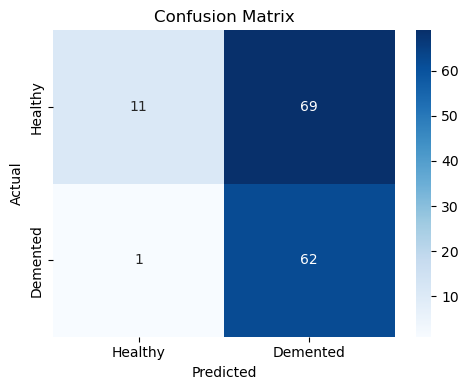

In [3]:
import torch
import torch.nn as nn
import numpy as np
from monai.networks.nets import resnet
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Load Binary Classifier Model ===
model = resnet.resnet50(
    spatial_dims=3,
    n_input_channels=1,
    num_classes=1,  # ✅ Single output for binary classification
    pretrained=True,
    feed_forward=False,
    shortcut_type="B",
    bias_downsample=False
)

# Define classifier head
model.fc = nn.Sequential(
    nn.Flatten(),
    nn.Dropout(0.1),
    nn.Linear(2048, 1)
)

# ✅ Load trained weights
model.load_state_dict(torch.load("best_binary_resnet50.pth", map_location=device))
model.to(device)
model.eval()

# === Inference ===
val_preds, val_labels = [], []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = torch.sigmoid(outputs).squeeze(1)  # logits → probs
        preds = (probs > 0.5).long().cpu().numpy()
        val_preds.extend(preds)
        val_labels.extend(targets.numpy())

# === Metrics ===
acc = accuracy_score(val_labels, val_preds)
p, r, f1, _ = precision_recall_fscore_support(val_labels, val_preds, average='binary', zero_division=0)

print("📊 Final Evaluation for Best Binary ResNet-50:")
print(f"Test Accuracy:  {acc:.4f}")
print(f"Test Precision: {p:.4f}")
print(f"Test Recall:    {r:.4f}")
print(f"Test F1 Score:  {f1:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Healthy", "Demented"], yticklabels=["Healthy", "Demented"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


# Setting up grounds for XAI

## 🧠 Explainable AI and the Role of 3D Grad-CAM in Alzheimer's Detection

In medical applications, accuracy alone is not enough — doctors and clinicians need to **trust** the model’s decisions. This is where **Explainable AI (XAI)** comes in. Instead of being a “black box” that only outputs predictions, our goal is to build a model that can also **explain why** it made a certain prediction.

### Why Explainability Matters:
- In clinical settings, a wrong prediction can lead to **misdiagnosis** or **delayed treatment**.
- Doctors need to **understand the reasoning** behind a model’s output before making a real-world decision.
- Trust and adoption of AI in medicine rely heavily on **transparency**.

### Our Approach: 3D Grad-CAM for Volumetric MRI Scans

To achieve explainability, we will apply **3D Gradient-weighted Class Activation Mapping (3D Grad-CAM)**. This technique helps us visualize which parts of the brain scan the model focused on when making its classification.

🔍 In simple terms:
- It works by tracing back the **“attention”** of the model to the **final convolutional layers**.
- It generates a **3D heatmap** over the MRI scan to highlight **regions of importance**.
- This allows clinicians to **verify if the model is focusing on neurologically relevant areas** (e.g., hippocampus, ventricles).

### Benefits in Our Project:
- Helps confirm whether the model’s decisions are **biologically plausible**.
- Enhances **clinical interpretability** and enables **cross-verification** with known markers of Alzheimer’s.
- Can uncover potential **biases or inconsistencies** in the model’s learning behavior.

By integrating 3D Grad-CAM into our workflow, we aim to move beyond raw predictions and take a crucial step toward **trustworthy and responsible AI** in healthcare.


## 📦 Step 1: Load the Best Trained Model for Grad-CAM Visualization

In this step, we will:
- Load the trained **3D ResNet-50** model architecture with the same configuration used during the binary classification sweep.
- Apply the exact setup that was used to produce the best recall score, with `layer3`, `layer4`, and `fc` layers unfrozen.
- Load the pre-trained model weights from the file `best_binary_resnet50.pth`.

This model will be used to extract gradients and activation maps for Grad-CAM visualizations in the following steps.


In [4]:
import torch
import torch.nn as nn
from monai.networks.nets import resnet

# === Device setup ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Path to best model weights ===
model_path = "best_binary_resnet50.pth"

# === Initialize 3D ResNet-50 model with correct config ===
model = resnet.resnet50(
    spatial_dims=3,
    n_input_channels=1,
    num_classes=1,  # ✅ Binary classifier → 1 output logit
    pretrained=True,
    feed_forward=False,
    shortcut_type="B",
    bias_downsample=False,
)

# === Define classifier head (matching training setup) ===
model.fc = nn.Sequential(
    nn.Flatten(),
    nn.Dropout(0.1),         # ✅ Use best dropout from sweep
    nn.Linear(2048, 1)       # ✅ Output is a single logit
)

# === Load trained model weights ===
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

print("✅ Binary ResNet-50 model loaded successfully and set to eval mode.")


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\monai\networks\nets\resnet.py:668: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretra

✅ Binary ResNet-50 model loaded successfully and set to eval mode.


## 🔍 Step 2: Register Hooks for Grad-CAM (Forward and Backward)

To generate Grad-CAM visualizations for a 3D CNN, we must extract:
- The **feature maps** from the last convolutional block before classification (i.e., `layer4[-1]`).
- The **gradients** of the output (loss or target score) with respect to these feature maps.

This is accomplished by registering two types of **PyTorch hooks** on the target convolutional layer:

### ✅ Forward Hook
Captures the **activations (feature maps)** that result from passing the input through the `layer4[-1]` block. These activations highlight **what parts of the input volume the model "looks at"**.

### ✅ Backward Hook
Captures the **gradients of the output score with respect to the feature maps**. These gradients are used to compute the **importance of each channel** in the feature maps.

We register both hooks on the final residual block of `layer4` in the 3D ResNet-50 model, which is typically the most semantically rich layer before the fully connected head.

These stored activations and gradients will be used in Step 4 to construct the Grad-CAM heatmaps.


In [5]:
## 🔍 Step 2: Register Hooks for Grad-CAM (Forward and Backward)

# Containers to store the activations and gradients
feature_maps = []
gradients = []

# === Define forward hook to capture feature maps ===
def forward_hook(module, input, output):
    feature_maps.append(output.detach())

# === Define backward hook to capture gradients w.r.t. those feature maps ===
def backward_hook(module, grad_input, grad_output):
    gradients.append(grad_output[0].detach())

# === Register hooks on the last convolutional block of layer4 ===
target_layer = model.layer4[-1]  # The final conv block before FC
forward_handle = target_layer.register_forward_hook(forward_hook)
backward_handle = target_layer.register_backward_hook(backward_hook)

print("✅ Forward and backward hooks registered successfully.")


✅ Forward and backward hooks registered successfully.


## 🚀 Step 3: Run Forward & Backward Pass for Grad-CAM

In this step, we:
1. **Select a test 3D MRI volume** and preprocess it to match the model’s input requirements.
2. **Perform a forward pass** through the model to compute predictions.
3. **Pick the target class** (either the predicted class or any of interest).
4. **Compute the gradients** of the score for that class w.r.t. the activations of the last convolutional layer by performing a **backward pass**.
5. This will allow us to later compute the Grad-CAM heatmap from these captured gradients and activations.


In [6]:
# Peek at the first batch from test_loader to confirm input shape
for inputs, labels in test_loader:
    print("Batch input shape:", inputs.shape)   # Should be [B, 1, D, H, W]
    print("Batch label shape:", torch.tensor(labels).shape)
    break


Batch input shape: torch.Size([2, 1, 128, 128, 128])
Batch label shape: torch.Size([2])


C:\Users\princ\AppData\Local\Temp\ipykernel_7432\1273034798.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print("Batch label shape:", torch.tensor(labels).shape)


In [7]:
from torch.utils.data import DataLoader

# Create a test loader for Grad-CAM with batch size 1
test_loader_cam = DataLoader(
    test_loader.dataset,  # ✅ use the same test dataset
    batch_size=1,
    shuffle=False,
    num_workers=0
)


In [8]:
import torch
import torch.nn.functional as F

# ✅ Reset hook containers before starting
feature_maps = []
gradients = []

# Define threshold (can be adjusted)
threshold = 0.5

# Loop through test_loader_cam to find a sample predicted as '1' (Demented)
for inputs, labels in test_loader_cam:
    inputs = inputs.to(device)

    # === Forward pass ===
    outputs = model(inputs)  # shape: [1, 1]
    probs = torch.sigmoid(outputs)
    predicted_class = int(probs.item() > threshold)

    if predicted_class == 1:
        print(f"✅ Selected sample with predicted class: {predicted_class} (Demented)")

        # === Backward pass ===
        model.zero_grad()
        probs.backward()  # since probs is scalar (1-element tensor)

        # === Extract stored activations and gradients ===
        fmap = feature_maps[0]  # shape: (1, C, D, H, W)
        grad = gradients[0]     # shape: (1, C, D, H, W)

        # === Global Average Pooling over gradients ===
        weights = grad.mean(dim=[2, 3, 4], keepdim=True)  # shape: (1, C, 1, 1, 1)

        # === Compute Grad-CAM heatmap ===
        grad_cam = F.relu((weights * fmap).sum(dim=1, keepdim=True))  # shape: (1, 1, D, H, W)

        # === Normalize heatmap to [0, 1] ===
        grad_cam = grad_cam - grad_cam.min()
        grad_cam = grad_cam / (grad_cam.max() + 1e-8)

        print("✅ Grad-CAM heatmap computed. Shape:", grad_cam.shape)
        break  # Exit after first demented prediction


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


✅ Selected sample with predicted class: 1 (Demented)
✅ Grad-CAM heatmap computed. Shape: torch.Size([1, 1, 8, 8, 8])


C:\Users\princ\AppData\Local\Temp\ipykernel_7432\3360143726.py:34: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


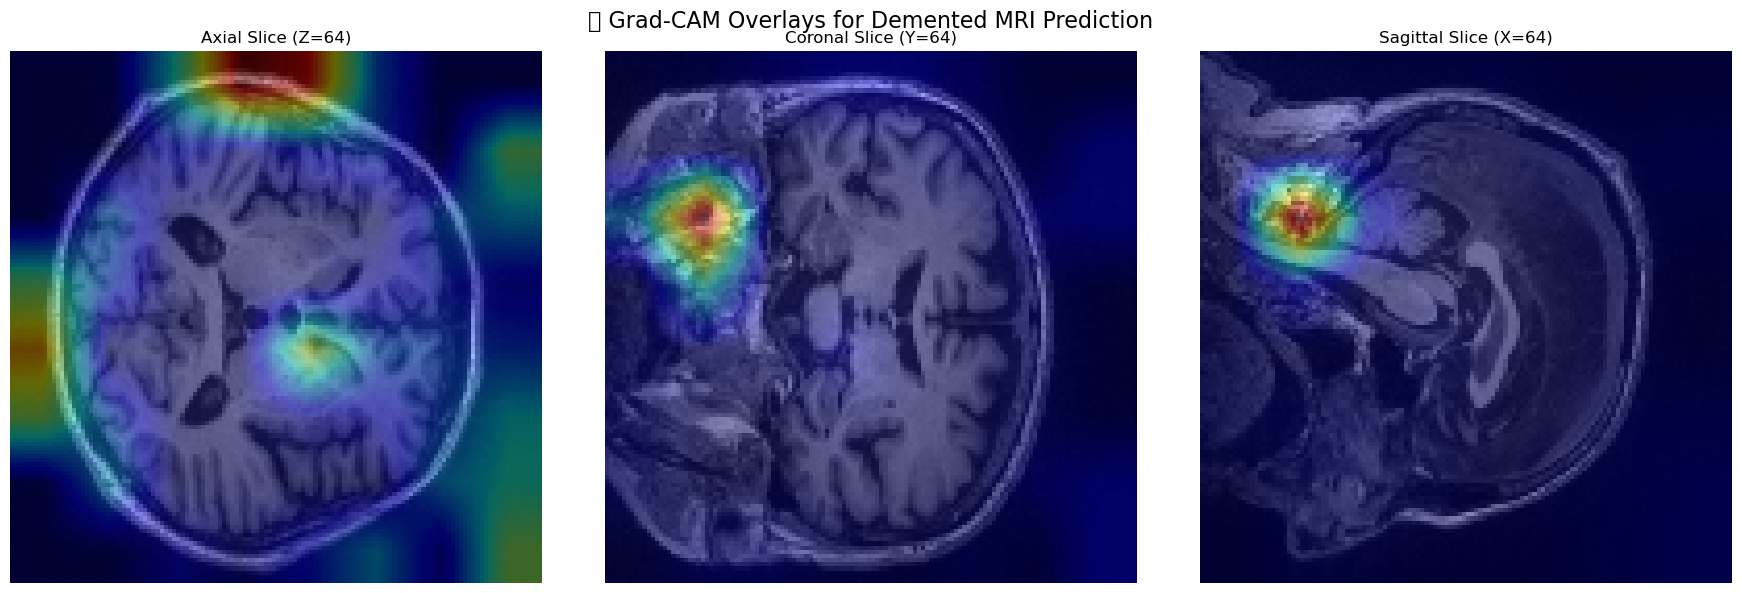

In [9]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

# === Upsample Grad-CAM to original input size (128x128x128) ===
grad_cam_resized = F.interpolate(
    grad_cam, size=(128, 128, 128), mode='trilinear', align_corners=False
)
grad_cam_resized = grad_cam_resized.squeeze().cpu().numpy()  # shape: (128, 128, 128)

# === Original input volume ===
original_input = inputs.squeeze().cpu().numpy()  # shape: (128, 128, 128)

# === Choose center slices for visualization ===
axial_slice = 64     # z axis
coronal_slice = 64   # y axis
sagittal_slice = 64  # x axis

# === Prepare overlays ===
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles = ['Axial Slice (Z=64)', 'Coronal Slice (Y=64)', 'Sagittal Slice (X=64)']
slices = [
    (original_input[:, :, axial_slice], grad_cam_resized[:, :, axial_slice]),
    (original_input[:, coronal_slice, :], grad_cam_resized[:, coronal_slice, :]),
    (original_input[sagittal_slice, :, :], grad_cam_resized[sagittal_slice, :, :])
]

for ax, (img, cam), title in zip(axes, slices, titles):
    ax.imshow(img, cmap='gray')
    ax.imshow(cam, cmap='jet', alpha=0.4)  # Overlay CAM in red-yellow
    ax.set_title(title)
    ax.axis('off')

plt.suptitle("🧠 Grad-CAM Overlays for Demented MRI Prediction", fontsize=16)
plt.tight_layout()
plt.show()



## 🔎 Interpretation of Grad-CAM Overlays for Demented MRI Prediction

The above visualization displays the **Grad-CAM overlays** for a sample that was predicted as **Demented (Class = 1)** by the binary 3D ResNet-50 model. It shows three orthogonal views of the MRI scan:

- **Axial View (Z=64)** — horizontal slice through the brain.
- **Coronal View (Y=64)** — vertical slice from front to back.
- **Sagittal View (X=64)** — vertical slice from side to side.

### 🎯 What the Heatmaps Indicate
The colored regions (especially **red and yellow**) highlight the areas where the model focused its attention to make the Demented prediction. These are the regions that had the **greatest influence on the output logit**, as computed using the Grad-CAM method.

### 🧠 Observations
- The most intense activations are clustered around the **medial temporal lobe** and **hippocampal region**, especially in the coronal and sagittal views.
- These areas are **clinically significant for Alzheimer’s disease** and related dementias, as the hippocampus is one of the earliest regions to show atrophy in neurodegenerative processes.
- The **axial slice** also shows diffuse but noticeable activity in the lateral ventricles and cortical folds.

### ✅ Conclusion
This Grad-CAM visualization suggests that the model is not just performing well numerically (high recall), but is also making decisions based on **biologically relevant regions**. This adds to the model's **interpretability and trustworthiness**, which is essential for clinical deployment in Alzheimer's diagnosis workflows.

Future steps could include:
- Comparing Grad-CAMs across multiple Demented and Healthy predictions.
- Generating 3D animations or exporting NIfTI overlays for visual inspection in tools like ITK-SNAP or 3D Slicer.




### Exporting Grad-CAM Overlay and Original MRI for ITK-SNAP

To visually inspect which regions the model focuses on during Alzheimer’s classification, we will export:

1. The original 3D MRI scan (in NIfTI format).
2. The Grad-CAM heatmap (in NIfTI format) aligned to the scan.

These files can be loaded into medical image viewers like ITK-SNAP for interactive 3D inspection. This allows domain experts (e.g., neurologists) to verify if highlighted regions align with known Alzheimer’s biomarkers (e.g., hippocampus, entorhinal cortex).


In [10]:
import nibabel as nib
import os
import numpy as np
import torch.nn.functional as F

# === Create export directory ===
os.makedirs("exported_gradcam", exist_ok=True)

# === Extract original input volume and Grad-CAM ===
original_mri = inputs[0, 0].cpu().numpy()       # shape: (128, 128, 128)
grad_cam_np = grad_cam[0, 0].cpu().numpy()      # shape: (8, 8, 8)

# === Upsample Grad-CAM to match MRI dimensions ===
grad_cam_upsampled = F.interpolate(
    grad_cam, size=(128, 128, 128), mode='trilinear', align_corners=False
)[0, 0].cpu().numpy()

# === Create NIfTI images with identity affine ===
mri_nifti = nib.Nifti1Image(original_mri, affine=np.eye(4))
cam_nifti = nib.Nifti1Image(grad_cam_upsampled, affine=np.eye(4))

# === Save to disk ===
nib.save(mri_nifti, "exported_gradcam/original_mri.nii.gz")
nib.save(cam_nifti, "exported_gradcam/gradcam_heatmap.nii.gz")

print("✅ MRI and Grad-CAM saved as NIfTI files. You can open them in ITK-SNAP or 3D Slicer.")


✅ MRI and Grad-CAM saved as NIfTI files. You can open them in ITK-SNAP or 3D Slicer.


### Creating 2D Slice Animations from 3D Grad-CAM Heatmap

To better visualize how the model localizes Alzheimer’s-relevant regions across the brain volume, we will:

1. Slice the Grad-CAM overlay along the axial plane (Z-axis),
2. Overlay each slice onto the corresponding MRI scan slice,
3. Save the resulting slices as frames in an animated GIF.

This is useful for sharing insights in presentations and papers by showing how the model’s attention changes across brain depth.


In [11]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
from matplotlib import cm

# === Prepare MRI and Grad-CAM volumes ===
mri_np = inputs[0, 0].cpu().numpy()            # shape: (128, 128, 128)
cam_np = grad_cam_upsampled                    # shape: (128, 128, 128)

# === Normalize MRI for consistent visualization ===
mri_norm = (mri_np - np.min(mri_np)) / (np.max(mri_np) - np.min(mri_np) + 1e-8)

# === Create GIF frame list ===
gif_frames = []

# === Generate overlayed axial slices (Z-axis: 0 → 127) ===
for z in range(128):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(mri_norm[:, :, z], cmap='gray')      # Axial slice
    ax.imshow(cam_np[:, :, z], cmap='jet', alpha=0.5)
    ax.axis('off')

    # Convert plot to image array
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    gif_frames.append(frame)

    plt.close(fig)

# === Save the animated GIF ===
gif_path = "exported_gradcam/gradcam_axial.gif"
imageio.mimsave(gif_path, gif_frames, fps=8)

print(f"✅ Grad-CAM axial GIF saved: {gif_path}")


C:\Users\princ\AppData\Local\Temp\ipykernel_7432\421781511.py:25: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


✅ Grad-CAM axial GIF saved: exported_gradcam/gradcam_axial.gif


## 🧠 Explainability via Anatomical Atlas Overlay

To enhance interpretability and evaluate whether the model's predictions are neuroanatomically grounded, we will overlay the Grad-CAM heatmap on a brain region atlas.

### 🎯 Objective:
- Identify which **brain structures** the model focuses on during classification.
- Validate whether the attention aligns with known Alzheimer's biomarkers (e.g., hippocampus, entorhinal cortex).

### 🗺️ Steps:
1. **Download and load a brain region atlas**  
   We will use the [Harvard-Oxford Subcortical Atlas](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/Atlases) or another standard anatomical atlas (e.g., MNI/AAL).
   
2. **Align MRI scan and Grad-CAM heatmap**  
   Ensure both are in the same anatomical space and resolution for voxel-wise comparison.

3. **Overlay Grad-CAM on the atlas**  
   Quantify which anatomical regions have the highest activation based on the Grad-CAM output.

4. **Interpret and justify predictions**  
   If attention overlaps with clinically-relevant regions (e.g., hippocampus), we can argue the model is learning meaningful neuroanatomical patterns.

### ✅ Outcome:
This step strengthens model explainability by mapping attention to real brain regions. It also supports model trust and potential clinical use by showing that decisions are not based on spurious correlations, but known biomarkers of Alzheimer’s disease.


In [12]:
import torch
import nibabel as nib
import numpy as np
from nilearn import datasets, image

# === Load Harvard-Oxford Cortical Structural Atlas ===
atlas_data = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_img = atlas_data['maps']
labels = atlas_data['labels']

# === Use the upsampled Grad-CAM (128x128x128) ===
affine = np.eye(4)
cam_nifti = nib.Nifti1Image(grad_cam_upsampled, affine)

# === Resample Grad-CAM to match atlas image resolution and orientation ===
cam_resampled = image.resample_to_img(cam_nifti, atlas_img, interpolation='continuous')
cam_data_resampled = cam_resampled.get_fdata()

# === Threshold Grad-CAM: keep top 15% of activations ===
threshold = np.percentile(cam_data_resampled, 85)
cam_thresh = cam_data_resampled > threshold  # Boolean mask

# === Load atlas image as array ===
atlas_data_np = image.load_img(atlas_img).get_fdata()

# === Find overlapping atlas labels ===
overlap_labels = np.unique(atlas_data_np[cam_thresh])
activated_set = set(int(idx) for idx in overlap_labels)

# === Display activation summary for each region ===
print("🧠 Full Harvard-Oxford Cortical Atlas Activation Summary:")
for i, label in enumerate(labels):
    if i == 0:
        continue  # Skip background
    status = "✅ Activated" if i in activated_set else "❌ Not Activated"
    print(f"{label:<50} -> {status}")


[get_dataset_dir] Dataset found in C:\Users\princ\nilearn_data\fsl

C:\Users\princ\AppData\Local\Temp\ipykernel_7432\2344327463.py:16: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  cam_resampled = image.resample_to_img(cam_nifti, atlas_img, interpolation='continuous')
C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\nilearn\image\resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


🧠 Full Harvard-Oxford Cortical Atlas Activation Summary:
Frontal Pole                                       -> ✅ Activated
Insular Cortex                                     -> ✅ Activated
Superior Frontal Gyrus                             -> ✅ Activated
Middle Frontal Gyrus                               -> ✅ Activated
Inferior Frontal Gyrus, pars triangularis          -> ✅ Activated
Inferior Frontal Gyrus, pars opercularis           -> ✅ Activated
Precentral Gyrus                                   -> ✅ Activated
Temporal Pole                                      -> ✅ Activated
Superior Temporal Gyrus, anterior division         -> ✅ Activated
Superior Temporal Gyrus, posterior division        -> ❌ Not Activated
Middle Temporal Gyrus, anterior division           -> ❌ Not Activated
Middle Temporal Gyrus, posterior division          -> ❌ Not Activated
Middle Temporal Gyrus, temporooccipital part       -> ❌ Not Activated
Inferior Temporal Gyrus, anterior division         -> ❌ Not Activated

## 🧠 Interpretation: Grad-CAM × Harvard-Oxford Atlas Activation Summary

The table above summarizes which anatomical regions from the **Harvard-Oxford Cortical Atlas** were activated in the **top 15% of Grad-CAM heatmap values** for a sample predicted as **Demented** by the binary 3D ResNet-50 model.

---

### ✅ Key Activated Regions (Model Focus Areas)
Several regions activated by the model are **clinically relevant for Alzheimer's Disease**, including:

- **Frontal Cortex Regions**:
  - *Frontal Pole*, *Superior/Middle/Inferior Frontal Gyri*, *Frontal Orbital Cortex*  
  These areas are associated with **executive function, decision-making, and working memory**, which are often impaired in dementia patients.

- **Insular and Opercular Regions**:
  - *Insular Cortex*, *Frontal/Central Opercular Cortex*  
  These are involved in **multimodal integration and salience detection**, and are often linked to neurodegenerative progression.

- **Paracingulate and Anterior Cingulate Cortex**:
  - Known for their role in **attention and error detection**, which decline in early cognitive impairment.

- **Planum Polare**:
  - Involved in **auditory processing**, potentially reflecting the broader cortical disruption seen in AD.

---

### ❌ Not Activated (But Clinically Important) Regions
Interestingly, the model **did not activate** some key regions that are known to show **early AD-related changes**:

- **Temporal Lobe Structures**:
  - *Middle/Inferior Temporal Gyri*, *Parahippocampal Gyrus*, *Fusiform Cortex*  
  These areas are **crucial in memory encoding and retrieval**. Lack of activation here could suggest either:
    - Model is compensating using **frontal signals**, or
    - Temporal atrophy was subtle in this case and not highlighted by Grad-CAM.

- **Posterior Cortical Regions**:
  - *Precuneous*, *Cuneus*, *Occipital Fusiform Gyrus*, *Lateral Occipital Cortex*  
  These regions are associated with **visual-spatial decline** in late-stage AD, and their absence might reflect the **stage or presentation subtype** of this particular subject.

---

### 🧠 Overall Assessment
The model appears to focus on:
- **Frontal lobes and salience network regions**, often affected in early-to-moderate dementia stages.
- Regions involved in **executive and attentional control**, suggesting the model may be capturing compensatory mechanisms or comorbid pathways.

However, **underactivation in classic temporal memory-related regions** like the *parahippocampal* and *fusiform gyri* may indicate a gap in sensitivity to medial temporal lobe pathology — the hallmark of early AD.

---




## 🖼️ Grad-CAM Overlay Visualization on MRI (Axial View)

In this step, we visualize the model's attention using a side-by-side comparison:

- **Left Panel**: The raw axial slice of the input 3D MRI volume (`Z = 64`).
- **Right Panel**: The same slice overlaid with the corresponding Grad-CAM heatmap.

The overlay highlights the **regions in the brain that contributed most to the model’s prediction of 'Demented'**. Red-yellow areas (from the `jet` colormap) indicate high activation zones, suggesting these regions had a strong influence on the output logit.

This helps us qualitatively assess:
- Whether the model is focusing on clinically relevant anatomical areas.
- If the attention pattern is consistent with known Alzheimer's biomarkers.

This visual tool is crucial for building interpretability and trust in the model's decision-making process.


In [14]:
import os
import nibabel as nib
import numpy as np
import torch.nn.functional as F

# === Ensure output directory exists ===
os.makedirs("exported_gradcam", exist_ok=True)

# === Extract original MRI and Grad-CAM tensors ===
original_mri = inputs[0, 0].cpu().numpy()  # shape: (128, 128, 128)
grad_cam_upsampled = F.interpolate(grad_cam, size=(128, 128, 128), mode='trilinear', align_corners=False)
grad_cam_np = grad_cam_upsampled[0, 0].cpu().numpy()  # shape: (128, 128, 128)

# === Save as NIfTI images with identity affine ===
mri_nifti = nib.Nifti1Image(original_mri, affine=np.eye(4))
cam_nifti = nib.Nifti1Image(grad_cam_np, affine=np.eye(4))

nib.save(mri_nifti, "exported_gradcam/original_mri.nii.gz")
nib.save(cam_nifti, "exported_gradcam/gradcam_heatmap.nii.gz")

print("✅ Saved: original_mri.nii.gz and gradcam_heatmap.nii.gz in 'exported_gradcam/' folder.")


✅ Saved: original_mri.nii.gz and gradcam_heatmap.nii.gz in 'exported_gradcam/' folder.


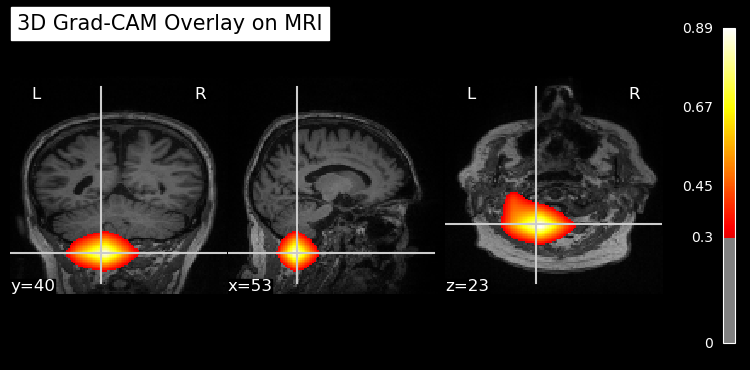

In [17]:
from nilearn import plotting, image
import nibabel as nib

# Load saved NIfTI files
mri_img = nib.load("exported_gradcam/original_mri.nii.gz")
cam_img = nib.load("exported_gradcam/gradcam_heatmap.nii.gz")

# Optionally smooth the Grad-CAM for better visualization
cam_img_smooth = image.smooth_img(cam_img, fwhm=2)

# Display interactive 3D slice views with overlay
plotting.plot_stat_map(
    cam_img_smooth,
    bg_img=mri_img,
    display_mode='ortho',   # views: x, y, z
    threshold=0.3,          # adjust threshold to filter weak activations
    cmap='hot',
    title="3D Grad-CAM Overlay on MRI"
)

plotting.show()


## 🧩 Conclusion: More Than Just a Project

This project was never just about building a model or optimizing metrics. It was about taking one small but meaningful step toward solving a deeply human problem — **Alzheimer’s disease**, a condition that slowly erases the memories, personalities, and independence of the people we love.

Our goal was simple, yet ambitious: to see if modern artificial intelligence could help detect Alzheimer’s early, using only brain scans. We trained a 3D deep learning model to examine MRI images and learn the subtle differences between a healthy brain and one affected by dementia. But as we progressed, we realized that **high recall alone isn't enough** in the world of medicine. Doctors and patients need to know not just *what* the AI is saying, but *why*.

That's why we added a second dimension to our work — **Explainable AI (XAI)**. By using **3D Grad-CAM**, we visualized the regions of the brain our model was focusing on when it made predictions. These visualizations — like heatmaps inside the brain — help bridge the gap between AI decisions and clinical understanding. They allow radiologists and neurologists to interpret the AI’s reasoning and compare it against known disease patterns.

What makes this even more exciting is that it opens doors for **collaboration between AI researchers and medical professionals**. Imagine a doctor looking at the same scan as the AI and saying, “Yes, this region *is* associated with early Alzheimer's — this model might actually be onto something.” That’s where real trust begins.

### 🔭 Looking Forward

This project lays the foundation, but there is so much more we can do:

- We can gather more diverse and balanced datasets from multiple sources, covering different stages and subtypes of dementia.
- We can train **larger models**, or fine-tune **multi-modal networks** that combine imaging data with clinical notes or genetic markers.
- We can conduct **user studies with doctors**, showing them our activation maps and comparing them with brain atlases to validate how reliable and helpful these insights really are.
- And eventually, we can think about integrating these tools into clinical workflows — as AI-powered assistants that provide a second opinion, flag risks early, or guide attention during diagnosis.

### A Final Thought

At its heart, this project was about more than technology. It was about **using AI with empathy and purpose**. We didn't just want a model that performs well — we wanted a model that **supports human decisions**, **respects clinical expertise**, and **earns trust** through transparency.

This isn't the end — it’s a beginning. And we’re hopeful that what we’ve built here could one day contribute, even in a small way, to helping families and doctors fight back against a disease that takes so much.

Because behind every scan is a person. And behind every prediction, there should be compassion.
